<a href="https://colab.research.google.com/github/ankiboyz/Machine-Learning/blob/master/ML_Assignment_Coupon_Reco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section **1**: Loading the DataSet and needed libraries (including installing the latest matplotlib).

> Need to **Restart Runtime** after the installation of the matplotlib latest library.

In [ ]:
# Mounting the drive.
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
# Need the latest version of matplotlib. Google colab by default has 3.2.2 version.
# Need to restart the runtime after this install happens.
!pip install matplotlib==3.4.2
!pip install feature_engine

     |████████████████████████████████| 10.3 MB 32.2 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


     |████████████████████████████████| 180 kB 30.9 MB/s 
     |████████████████████████████████| 9.8 MB 38.3 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
# importing needed libraries.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

# the version of matplotlib installed is 3.4.2 
print('matplotlib',matplotlib.__version__)

matplotlib 3.4.2


In [ ]:
# Loading the dataset. Since the dataset is xlsx , hence reading the excel.
coupon_data = pd.read_excel('/content/gdrive/My Drive/MLAIData/Coupon Reco.xlsx')

# Section **2**: Checking Imported Data Sanity

In [ ]:
# Data has been read fine; 25 columns and 12684 rows.
# Also shows the Null data columns.
# 5 Columns: Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50 contain Null data.
coupon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passenger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

In [ ]:
coupon_data['Y'].value_counts() # type is Series
# coupon_data['Y'].value_counts()[0] + coupon_data['Y'].value_counts()[1]
# There is no null / missing value for the Y column.

1    7210
0    5474
Name: Y, dtype: int64

# Section **3**: Information about the Dataset

The dataset contains 25 columns.
All columns except temperature are categorical variables in one sense or the other. Temperature since it has a limited cardinality of 3 in the dataset , hence can also be considered as categorical dataset.
These attributes in the datasets are widely categorized as the following: 
1. User Attributes
  ```
  gender
  age
  maritalStatus
  has_Children
  education
  occupation
  income
  Bar
  CoffeeHouse
  CarryAway
  RestaurantLessThan20
  Restaurant20To50
  ```

2. Contextual attributes
  ```
  destination
  location of user, coupon and destination: toCoupon_GEQ5min,toCoupon_GEQ15min, toCoupon_GEQ25min, direction_same, direction_opp
  weather
  temperature
  time
  passenger
  ```
3. Coupon attributes
  ```
  expiration
  coupon
  ```



# Section **4**: Exploratory Data Analysis

##Section **4.1**: Defining a couple of functions helpful for EDA

In [ ]:
def plot_count_standalone_and_with_target(independent_variable_name, dependent_variable_name, data_df):
  # data_df should have both the independent_variable_name and dependent_variable_name.
  f, axs = plt.subplots(1, 2, figsize=(13, 5), gridspec_kw=dict(width_ratios=[3, 6]))

  # Axes 0
  sns.countplot(independent_variable_name, data=data_df, ax=axs[0])
  # axs[0].bar_label(axs[0].containers[0])
  axs[0].set_xticklabels(axs[0].get_xticklabels(),rotation = 30)
  print(axs[0].containers[0].datavalues)  # [6283 3237 3164]
  cat_values = axs[0].containers[0].datavalues
  tot_cat_values = sum(cat_values)
  # printing percentage for every patch - patch is - Every bar and its corresponding background area is known as a patch.
   
  for p in axs[0].patches:
    # i=0;
    x_coordinate = p.get_x()
    y_coordinate = p.get_height() #ideally should be get_y()+ the height.
    width_of_bar = p.get_width()

    placement_of_text_y = y_coordinate + 100
    placement_of_text_x = x_coordinate + (width_of_bar/2)
    horizontal_alignment_text = 'center'
    color_text = 'black'
    # percent = round((y_coordinate/cat_values[i])*100,1)
    percent = round((y_coordinate/tot_cat_values)*100,1)
    label_text = str(y_coordinate) + ' / ' + str(percent) + '%'

    # i=i+1
    axs[0].text(placement_of_text_x, placement_of_text_y, label_text, ha=horizontal_alignment_text, color=color_text)

  # print(axs[0].patches)
  
  # Axes 1
  sns.countplot(independent_variable_name, data=data_df, hue=dependent_variable_name, ax=axs[1], palette = ('royalblue','skyblue'))
  # axs[1].bar_label(axs[1].containers[0])
  # axs[1].bar_label(axs[1].containers[1])

  # print(axs[1].containers[0].datavalues)
  # print(axs[1].patches)

  # cardinality of the dependent variable - based on this the number of containers in the axes 1 will be defined, which correspond to hues.
  num_containers_in_axes_1 = len(data_df[dependent_variable_name].unique())
  datavalues_in_each_container = len(data_df[independent_variable_name].unique())
  hue_grp_arr_sum= np.zeros(datavalues_in_each_container,int) # initializing the array with  0 for the unique values in the independent variable.

  for k in range(0,num_containers_in_axes_1):
    hue_grp_arr_sum = axs[1].containers[k].datavalues + hue_grp_arr_sum # this will add total for each hue group; len of this arr will be the number of independent variable unique values.
  # print(hue_grp_arr_sum)

  i=0
  for p in axs[1].patches:
    
    x_coordinate = p.get_x()
    y_coordinate = p.get_height() #ideally should be get_y()+ the height.
    width_of_bar = p.get_width()

    placement_of_text_y = y_coordinate + 100
    placement_of_text_x = x_coordinate + (width_of_bar/2)
    horizontal_alignment_text = 'center'
    color_text = 'black'
    # the patches of the axes are in the order of each container , so goes thru one container i.e. 1 class of Y for each unique value of independent variable
    # and then thru another class of Y for all unique values of independent. So , here first the call goes from no urgent place, home, work for y=0 and then for
    # y=1 for No Urgetn, Home , work. so order becomes 0,1,2 (y=0 and each val of independent var),3,4,5 (y=1 and each val of independent var).
    # so here remainder will do, bcoz for patch no 3 the percentage will be gathered by dividing by hue_sum_arr[0].
    remainder_i = i%datavalues_in_each_container
    # print(i,remainder_i,hue_grp_arr_sum[remainder_i])
    percent = round((y_coordinate/hue_grp_arr_sum[remainder_i])*100,1)
    label_text = str(y_coordinate) + ' / ' + str(percent) + '%'

    i=i+1
    axs[1].text(placement_of_text_x, placement_of_text_y, label_text, ha=horizontal_alignment_text, color=color_text)

  f.tight_layout()

In [ ]:
def plot_count_standalone_and_with_target_with_rotation_90(independent_variable_name, dependent_variable_name, data_df):
  # here, xticklabels are rotated by 90 degrees.
  # data_df should have both the independent_variable_name and dependent_variable_name.
  f, axs = plt.subplots(1, 2, figsize=(13, 5), gridspec_kw=dict(width_ratios=[3, 6]))

  # Axes 0
  sns.countplot(independent_variable_name, data=data_df, ax=axs[0])
  # axs[0].bar_label(axs[0].containers[0])
  axs[0].set_xticklabels(axs[0].get_xticklabels(),rotation = 90)
  print(axs[0].containers[0].datavalues)  # [6283 3237 3164]
  cat_values = axs[0].containers[0].datavalues
  tot_cat_values = sum(cat_values)
  # printing percentage for every patch - patch is - Every bar and its corresponding background area is known as a patch.
   
  for p in axs[0].patches:
    # i=0;
    x_coordinate = p.get_x()
    y_coordinate = p.get_height() #ideally should be get_y()+ the height.
    width_of_bar = p.get_width()

    placement_of_text_y = y_coordinate + 100
    placement_of_text_x = x_coordinate + (width_of_bar/2)
    horizontal_alignment_text = 'center'
    color_text = 'black'
    # percent = round((y_coordinate/cat_values[i])*100,1)
    percent = round((y_coordinate/tot_cat_values)*100,1)
    label_text = str(y_coordinate) + ' / ' + str(percent) + '%'

    # i=i+1
    axs[0].text(placement_of_text_x, placement_of_text_y, label_text, ha=horizontal_alignment_text, color=color_text)

  # print(axs[0].patches)
  
  # Axes 1
  sns.countplot(independent_variable_name, data=data_df, hue=dependent_variable_name, ax=axs[1], palette = ('royalblue','skyblue'))
  # axs[1].bar_label(axs[1].containers[0])
  # axs[1].bar_label(axs[1].containers[1])
  axs[1].set_xticklabels(axs[1].get_xticklabels(),rotation = 90)
  # print(axs[1].containers[0].datavalues)
  # print(axs[1].patches)

  # cardinality of the dependent variable - based on this the number of containers in the axes 1 will be defined, which correspond to hues.
  num_containers_in_axes_1 = len(data_df[dependent_variable_name].unique())
  datavalues_in_each_container = len(data_df[independent_variable_name].unique())
  hue_grp_arr_sum= np.zeros(datavalues_in_each_container,int) # initializing the array with  0 for the unique values in the independent variable.

  for k in range(0,num_containers_in_axes_1):
    hue_grp_arr_sum = axs[1].containers[k].datavalues + hue_grp_arr_sum # this will add total for each hue group; len of this arr will be the number of independent variable unique values.
  # print(hue_grp_arr_sum)

  i=0
  for p in axs[1].patches:
    
    x_coordinate = p.get_x()
    y_coordinate = p.get_height() #ideally should be get_y()+ the height.
    width_of_bar = p.get_width()

    placement_of_text_y = y_coordinate + 100
    placement_of_text_x = x_coordinate + (width_of_bar/2)
    horizontal_alignment_text = 'center'
    color_text = 'black'
    # the patches of the axes are in the order of each container , so goes thru one container i.e. 1 class of Y for each unique value of independent variable
    # and then thru another class of Y for all unique values of independent. So , here first the call goes from no urgent place, home, work for y=0 and then for
    # y=1 for No Urgetn, Home , work. so order becomes 0,1,2 (y=0 and each val of independent var),3,4,5 (y=1 and each val of independent var).
    # so here remainder will do, bcoz for patch no 3 the percentage will be gathered by dividing by hue_sum_arr[0].
    remainder_i = i%datavalues_in_each_container
    # print(i,remainder_i,hue_grp_arr_sum[remainder_i])
    percent = round((y_coordinate/hue_grp_arr_sum[remainder_i])*100,1)
    label_text = str(y_coordinate) + ' / ' + str(percent) + '%'

    i=i+1
    axs[1].text(placement_of_text_x, placement_of_text_y, label_text, ha=horizontal_alignment_text, color=color_text)

  f.tight_layout()

## Section **4.2**: EDA on independent variables and in relationship with the dependent variables. Also includes Feature Engineering wherever found relevant.

In [ ]:
# Checking the count of classes in the dependent / target variable.
coupon_data['Y'].value_counts()
# seems to be failry balanced; will see further if the need be for any further over-sampling or under-sampling.
# 5474/12684 #43.2%
# 7210/12684 #56.8

1    7210
0    5474
Name: Y, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Target variable distibution')

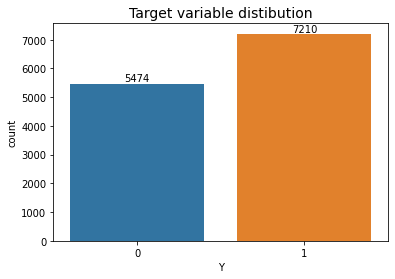

In [ ]:
colors = ['red','blue']
# ax = sns.countplot("Y",data=coupon_data,palette=colors)
ax = sns.countplot("Y",data=coupon_data)
ax.bar_label(ax.containers[0]) # Needs the latest version of matplotlib , pls ensure the engine was restarted after newer lib installed as in Section 1.
plt.title("Target variable distibution", fontsize=14)


**Q1. How's the distribution for the coupons being accepted or not on the way to Home, Work etc. i.e. destination look like?**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, '3982'), Text(0, 0, '1639'), Text(0, 0, '1589')]

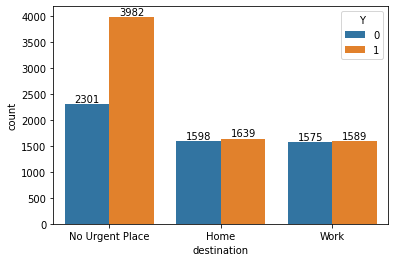

In [ ]:
ax = sns.countplot("destination",data=coupon_data,hue='Y')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, '6283'), Text(0, 0, '3237'), Text(0, 0, '3164')]

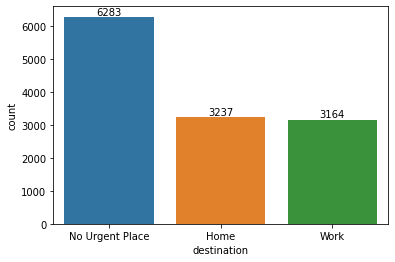

In [ ]:
ax = sns.countplot("destination", data=coupon_data )
ax.bar_label(ax.containers[0])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[6283 3237 3164]


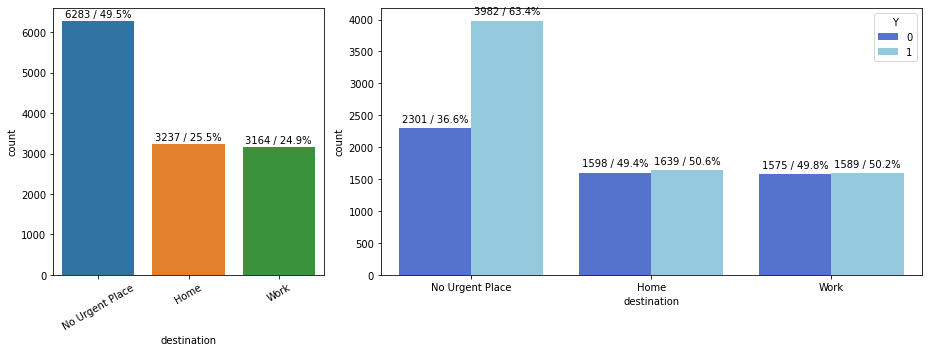

In [ ]:
plot_count_standalone_and_with_target('destination', 'Y', coupon_data)

**Above** shows that the **destination**:   

1. **being Home or Work both are almost similar** in behavior when it comes to accepting the coupon or not; in any case we will not combine them as of now; as it might exhibit a different behavior when alongwith another independent variable.
2. And infact there is almost **a 50-50 chance of a coupon been accepted or not** when the destination is either Home or Work.
3. The chances of a **coupon been accepted than not are more when destination** is **"No urgent place"**.



**Q2. How's the distribution for the coupons being accepted or not while with a Friend, Family or Alone i.e. passenger  look like?**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[7305 3298 1006 1075]


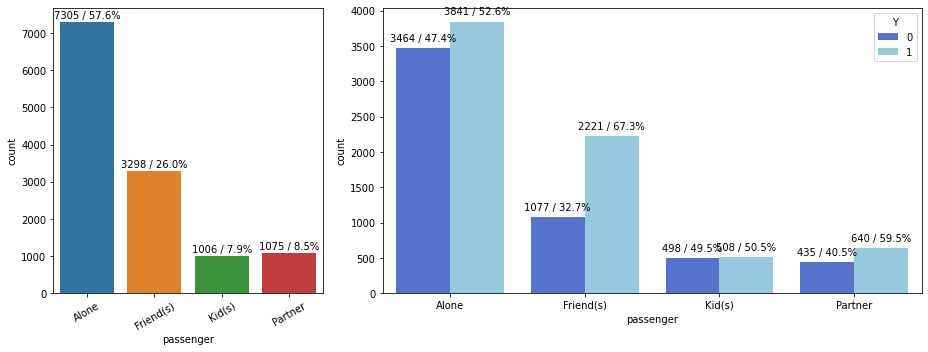

In [ ]:
plot_count_standalone_and_with_target('passenger', 'Y', coupon_data)

**Above** shows that if the **passenger** 

1.   is **friends** have 35% more chances of the coupon been accepted.
2.   is kids then the chances of a **coupon been accepted or not** are **almost equally  likely**.



**Q3. How's the distribution for the coupons being accepted or not in the Sunny, Rainy, Snowy weather look like?**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[10069  1210  1405]


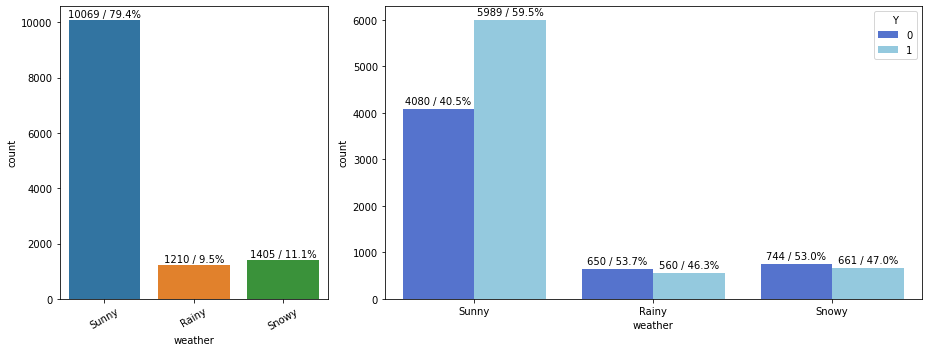

In [ ]:
plot_count_standalone_and_with_target('weather', 'Y', coupon_data)

Here, as for the weather:      
1.   There are more chances of coupon been accepted in the Sunny weather
2.   For both Rainy and Snowy weather the distribution for the coupons been accepted seems the same.



**Q4. How's the distribution for the coupons being accepted or not in the 30,55, 80 temperature  look like?**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[2316 3840 6528]


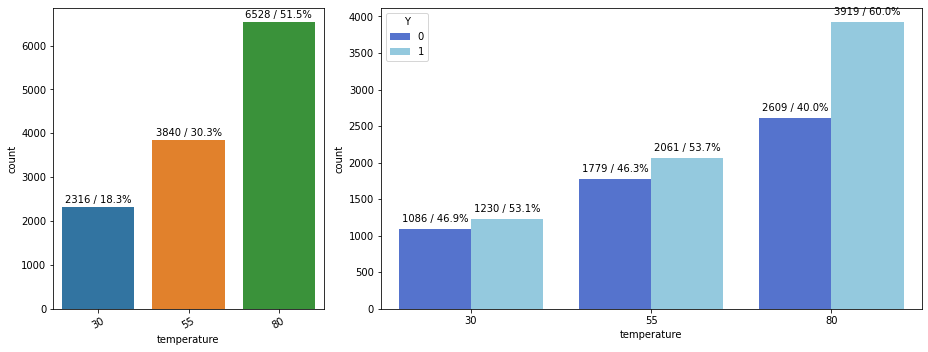

In [ ]:
plot_count_standalone_and_with_target('temperature', 'Y', coupon_data)

Here, as per above for temperature:    
1.   As the **temperature** goes up the chances of the coupon been accepted also gets higher.

**Q5. How's the distribution for the coupons being accepted or not in the time : 7AM, 10AM, 2PM, 6PM, 10PM  look like?**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[2009 2275 3230 3164 2006]


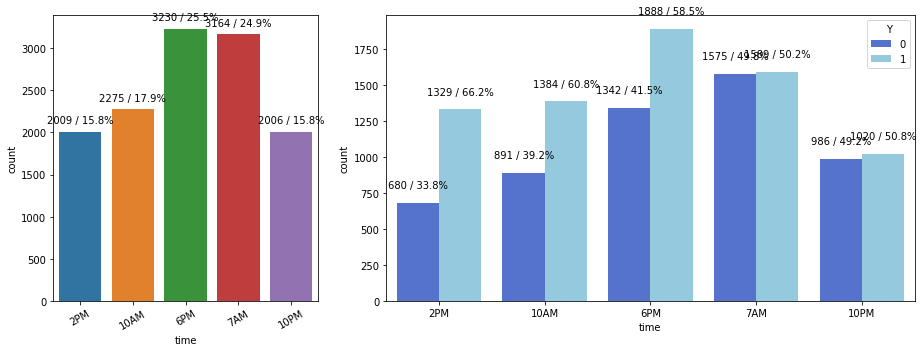

In [ ]:
plot_count_standalone_and_with_target('time', 'Y', coupon_data)

Here, for the **time**:    
1.   **both 7 AM and 10 PM shows** 50-50 chance of a coupon been accepted.
2.   decent morning (10 AM), afternoon(2 PM) and evening time (6 PM) **have more chances of a coupon been accepted** than being rejected.
Makes sense as well as these are normally the meal times.
3.    Also the acceptance/rejection percent for 6PM and 10AM is pretty similar.


**Q6. How's the distribution for the coupons being accepted or not in the coupon type : Restaurant(20), Coffee House, Carry out & Take away, Bar, Restaurant(20-50) look like?**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[2786 3996 2393 2017 1492]


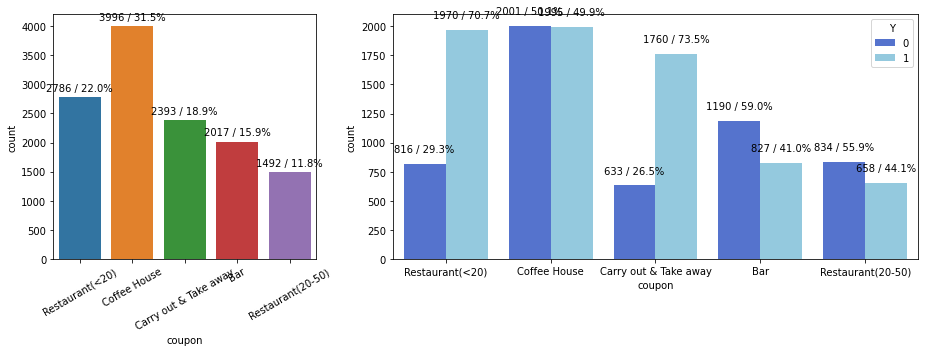

In [ ]:
plot_count_standalone_and_with_target('coupon', 'Y', coupon_data)

For **coupon** type:    
1.   **Carryout and take away** , followed by **Restaurant "20"** have highest **acceptance** percentage.
2.   **Bar** followed by **Restaurant 20-50** has highest **rejection** percentage.
3.   **Coffee House** offers **same acceptance/rejection** percentage.
4. One intuition that comes to the fore is generally Coffee House coupon type can also be merged with Restaurant('<'20) as both of the rates would be similar and in any case CoffeeHOuse coupon type has 50-50 for acceptance/rejection so should not be seemingly make any difference.**So here CoffeeHouse and Restaurant('<'20) can be merged.**
5. Another intuition is Bar and Restaurant(20-50) can also be merged as the prices could as well be similar on the coupon for ; also both show somewhat similar characteristics - reject percent is more for both and percentages are also quite similar. **So merging Bar and Restaurant(20-50)**.

**These feature engineering transforms are done towards the end.**

**Q7. How's the distribution for the coupons being accepted or not in the expiration (1d / 2h) look like?**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[7091 5593]


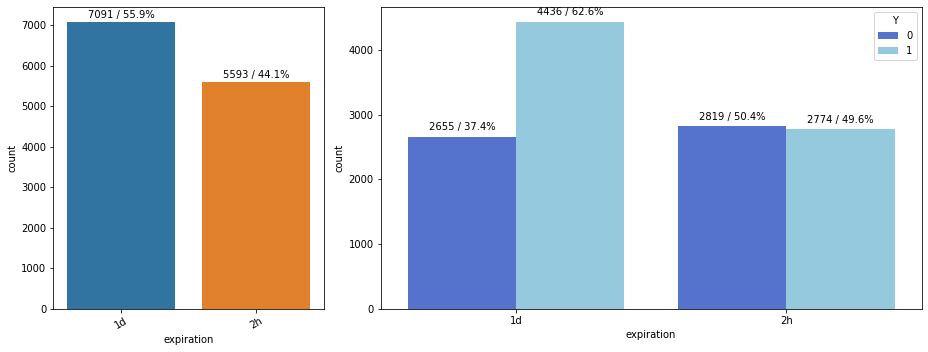

In [ ]:
plot_count_standalone_and_with_target('expiration', 'Y', coupon_data)

For expiration:      
1.   Having the expiry as 1 day has the greatest chances for coupon to be converted.
2.   Coupon with 2 h expiry has equal chances for a coupon been accepted or not.
3.   Here , this variable is providing a good amount of decrease in uncertainty since only 2 values are there and if the value is 1d the chances of a coupon been accepted stands at 62%.



**Q8. How's the distribution for the coupons being accepted or not for the gender (male/female) look like?**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[6511 6173]


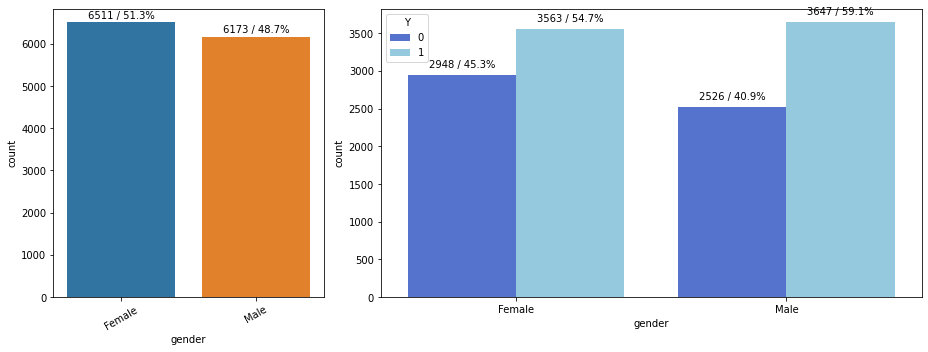

In [ ]:
plot_count_standalone_and_with_target('gender', 'Y', coupon_data)

Gender does not seem to offer much distinguish in letting know whether the coupon will be selected or not.
**Does not seem to be a significant predictor.**

**Q9. How's the distribution for the coupons being accepted or not for the age look like?**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[2653  686 2559 2039 1093 1788 1319  547]


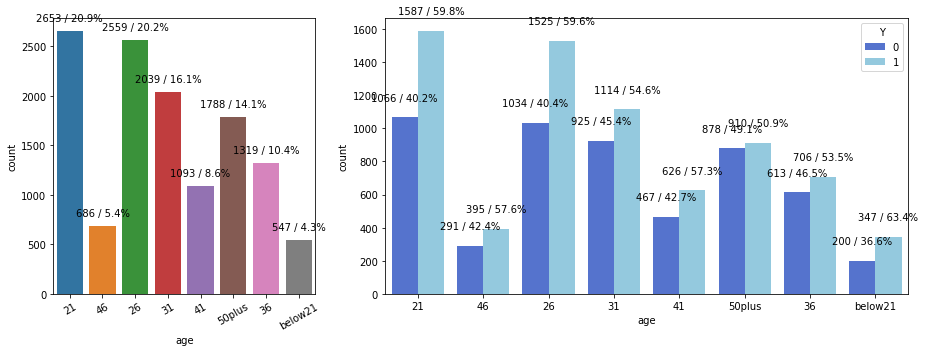

In [ ]:
plot_count_standalone_and_with_target('age', 'Y', coupon_data)

Here, for the **age**:    
1. ages 21,26 | ages 31,36 | ages 41,46 -- shows similar patterns of coupon acceptance and rejection.
2. This variable seems it can be clubbed into bins for the ages 0-20; 21-30; 31-40; 41-50; 50 and-above.
3. **below21** have the highest coupon acceptance percent (63%).

In [ ]:
# Feature Engineering - Creating a new column age_binned in the coupon_data df.
coupon_data_ft_engg_1 = coupon_data.copy()
coupon_data_ft_engg_1.loc[(coupon_data_ft_engg_1['age']==21) | (coupon_data_ft_engg_1['age']==26),'ft_engg_age_binned'] = '21-30'
coupon_data_ft_engg_1.loc[(coupon_data_ft_engg_1['age']==31) | (coupon_data_ft_engg_1['age']==36),'ft_engg_age_binned'] = '31-40'
coupon_data_ft_engg_1.loc[(coupon_data_ft_engg_1['age']==41) | (coupon_data_ft_engg_1['age']==46),'ft_engg_age_binned'] = '41-50'
coupon_data_ft_engg_1.loc[(coupon_data_ft_engg_1['age']=='below21'),'ft_engg_age_binned'] = '0-20'
coupon_data_ft_engg_1.loc[(coupon_data_ft_engg_1['age']=='50plus'),'ft_engg_age_binned'] = '51-above'


In [ ]:
print(coupon_data_ft_engg_1[['age','ft_engg_age_binned']].tail(50))

coupon_data_ft_engg_1.loc[(coupon_data_ft_engg_1['age']=='50plus')]

      age ft_engg_age_binned
12634  26              21-30
12635  26              21-30
12636  26              21-30
12637  26              21-30
12638  26              21-30
12639  26              21-30
12640  31              31-40
12641  31              31-40
12642  31              31-40
12643  31              31-40
12644  31              31-40
12645  31              31-40
12646  31              31-40
12647  31              31-40
12648  31              31-40
12649  31              31-40
12650  31              31-40
12651  31              31-40
12652  31              31-40
12653  31              31-40
12654  31              31-40
12655  31              31-40
12656  31              31-40
12657  31              31-40
12658  31              31-40
12659  31              31-40
12660  31              31-40
12661  31              31-40
12662  26              21-30
12663  26              21-30
12664  26              21-30
12665  26              21-30
12666  26              21-30
12667  26     

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,ft_engg_age_binned
409,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,50plus,Married partner,0,Bachelors degree,Personal Care & Service,$50000 - $62499,never,less1,less1,1~3,less1,1,0,0,0,1,1,51-above
410,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,50plus,Married partner,0,Bachelors degree,Personal Care & Service,$50000 - $62499,never,less1,less1,1~3,less1,1,0,0,0,1,1,51-above
411,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,50plus,Married partner,0,Bachelors degree,Personal Care & Service,$50000 - $62499,never,less1,less1,1~3,less1,1,1,0,0,1,1,51-above
412,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Male,50plus,Married partner,0,Bachelors degree,Personal Care & Service,$50000 - $62499,never,less1,less1,1~3,less1,1,1,0,0,1,0,51-above
413,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,50plus,Married partner,0,Bachelors degree,Personal Care & Service,$50000 - $62499,never,less1,less1,1~3,less1,1,1,0,0,1,0,51-above
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12607,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Female,50plus,Divorced,1,Some college - no degree,Personal Care & Service,$12500 - $24999,never,less1,1~3,1~3,less1,1,0,0,0,1,0,51-above
12608,Work,Alone,Snowy,30,7AM,Coffee House,1d,Female,50plus,Divorced,1,Some college - no degree,Personal Care & Service,$12500 - $24999,never,less1,1~3,1~3,less1,1,0,0,1,0,1,51-above
12609,Work,Alone,Snowy,30,7AM,Restaurant(<20),1d,Female,50plus,Divorced,1,Some college - no degree,Personal Care & Service,$12500 - $24999,never,less1,1~3,1~3,less1,1,1,0,0,1,0,51-above
12610,Work,Alone,Snowy,30,7AM,Bar,1d,Female,50plus,Divorced,1,Some college - no degree,Personal Care & Service,$12500 - $24999,never,less1,1~3,1~3,less1,1,1,1,0,1,0,51-above


[5212 1779 3358 1788  547]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


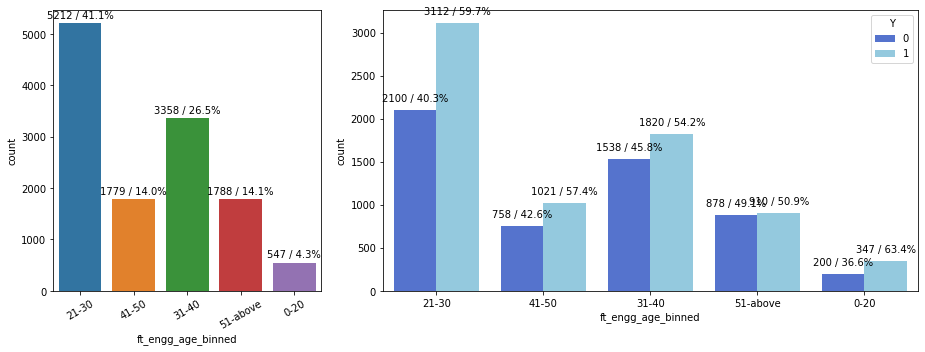

In [ ]:
plot_count_standalone_and_with_target('ft_engg_age_binned', 'Y', coupon_data_ft_engg_1)

**Q10. How's the distribution for the coupons being accepted or not for the maritalStatus look like?**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[2186 4752 5100  516  130]


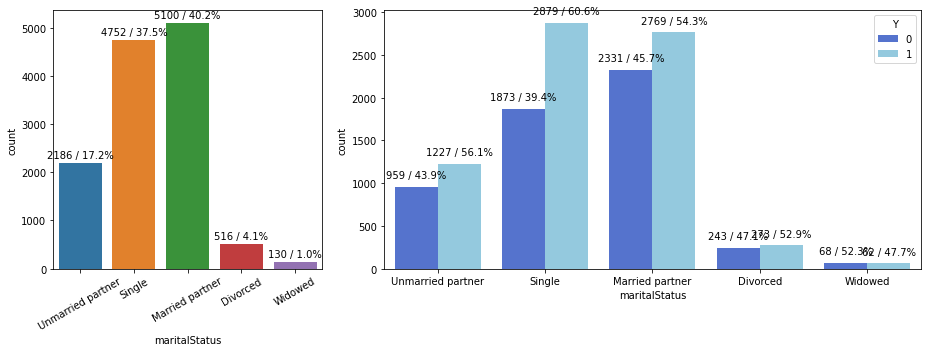

In [ ]:
plot_count_standalone_and_with_target('maritalStatus', 'Y', coupon_data_ft_engg_1)

For **maritalStatus** :    
1. **Married Partner** and **Unmarried Partner** shows similar behavior for acceptance / rejection of the coupon.
2. **Single** have the **highest percent** of acceptance of coupons.
3. **Widowed** *reject* more , **Divorced** *acccept* more.

**Q11. How's the distribution for the coupons being accepted or not for  has_children look like?**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[7431 5253]


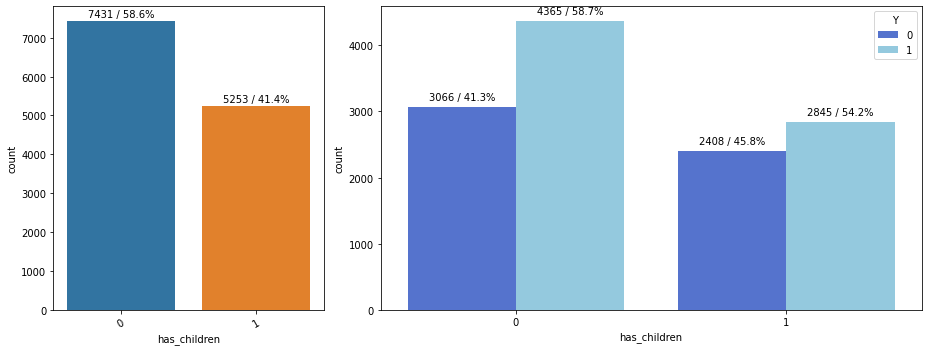

In [ ]:
plot_count_standalone_and_with_target('has_children', 'Y', coupon_data_ft_engg_1)

For **has_children**:    
1. people not having children have 4 percent more chances of accepting coupons.
2. However the percent is marginal different for having children or not.

**Q12. How's the distribution for the coupons being accepted or not for  education look like?**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[4351 4335 1153  905 1852   88]


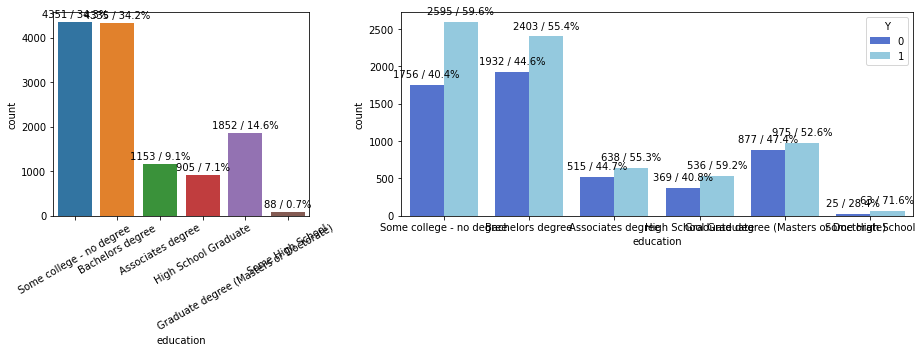

In [ ]:
plot_count_standalone_and_with_target('education', 'Y', coupon_data_ft_engg_1)

For **education**:    
1. **Some College - no degree** and **High School Graduate** are similar in behavior towards accepting / rejecting coupons.
2. **Bachelor's degree** and **Associates degree** are similar in behavior towards accepting / rejecting coupons.
3. **Some High School category** shows highest percent of coupon acceptance but **the data points are very less.(0.7%)**

In [ ]:
# Feature Engineering - merging the categories as mentioned above.
coupon_data_ft_engg_2 = coupon_data_ft_engg_1.copy()
coupon_data_ft_engg_2.loc[(coupon_data_ft_engg_2['education']=='Some college - no degree') | (coupon_data_ft_engg_2['education']=='High School Graduate'),'ft_engg_education'] = 'SomeColl&HighSchGrad'
coupon_data_ft_engg_2.loc[(coupon_data_ft_engg_2['education']=='Bachelors degree') | (coupon_data_ft_engg_2['education']=='Associates degree'),'ft_engg_education'] = 'Bach&AssocDegree'
coupon_data_ft_engg_2.loc[(coupon_data_ft_engg_2['education']=='Graduate degree (Masters or Doctorate)') ,'ft_engg_education'] = 'Graduate degree (Masters or Doctorate)'

# Also since the Some High School is a rare category with only 0.7 % of the data points. Let's merge it with the 'SomeColl&HighSchGrad' category.
coupon_data_ft_engg_2.loc[(coupon_data_ft_engg_2['education']=='Some High School') ,'ft_engg_education'] = 'SomeColl&HighSchGrad'



In [ ]:
coupon_data_ft_engg_2[['education','ft_engg_education']].tail(50)

coupon_data_ft_engg_2[['education','ft_engg_education','age','ft_engg_age_binned']].isna().sum()

education             0
ft_engg_education     0
age                   0
ft_engg_age_binned    0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[5344 5488 1852]


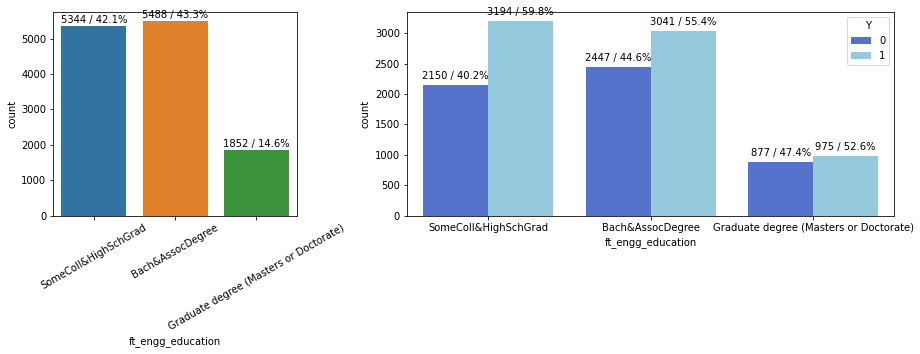

In [ ]:
plot_count_standalone_and_with_target('ft_engg_education', 'Y', coupon_data_ft_engg_2)

**Q13. How's the distribution for the coupons being accepted or not for  occupation look like?**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[1870  175 1584  943  242  244 1093  838  629 1408  170  175  241  639
  154  219  495  133  218  544  175  298  110   44   43]


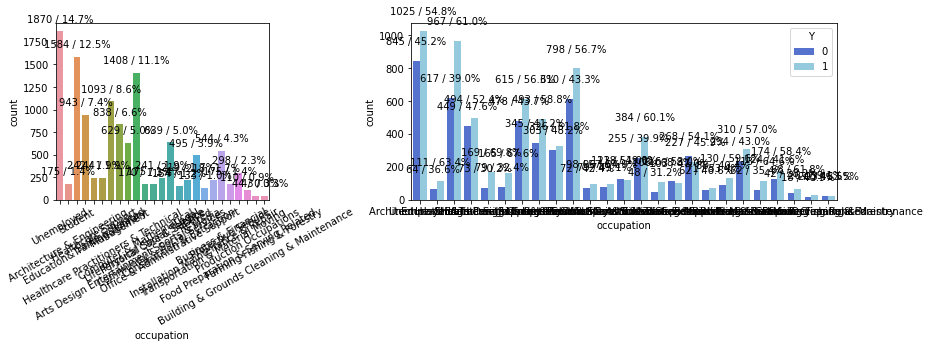

In [ ]:
plot_count_standalone_and_with_target('occupation', 'Y', coupon_data_ft_engg_2)

In [ ]:
# printing in a tabular fashion.
# print(coupon_data_ft_engg_2['occupation'].value_counts())
series_occupation_total = coupon_data_ft_engg_2['occupation'].value_counts() #pandas.core.series.Series

In [ ]:
# print(coupon_data_ft_engg_2.loc[(coupon_data_ft_engg_2['Y']==0)].groupby('occupation')['occupation'].count())
# print(coupon_data_ft_engg_2.loc[(coupon_data_ft_engg_2['Y']==1)].groupby('occupation')['occupation'].count())

series_occupation_y_0 = coupon_data_ft_engg_2.loc[(coupon_data_ft_engg_2['Y']==0)].groupby('occupation')['occupation'].count()
series_occupation_y_1 = coupon_data_ft_engg_2.loc[(coupon_data_ft_engg_2['Y']==1)].groupby('occupation')['occupation'].count()

In [ ]:
temp_occupation_df=pd.DataFrame()
j=0
for i in series_occupation_y_1.index:
  
  temp_occupation_df.loc[j,'name'] =  i
  temp_occupation_df.loc[j,'TotalCount'] =  series_occupation_total[i]
  temp_occupation_df.loc[j,'TotalCount%'] =  (series_occupation_total[i]/sum(series_occupation_total))*100
  temp_occupation_df.loc[j,'Y=0'] = series_occupation_y_0[i]
  temp_occupation_df.loc[j,'Y=1'] = series_occupation_y_1[i]
  temp_occupation_df.loc[j,'Y=0%'] = (series_occupation_y_0[i]/series_occupation_total[i])*100
  temp_occupation_df.loc[j,'Y=1%'] = (series_occupation_y_1[i]/series_occupation_total[i])*100
  j=j+1


In [ ]:
print(len(temp_occupation_df.loc[(temp_occupation_df['TotalCount%']<=5)]))
# There are 18 columns which have less 5 % of data.
temp_occupation_df.loc[(temp_occupation_df['TotalCount%']<=5)]['name']

18


0                    Architecture & Engineering
1      Arts Design Entertainment Sports & Media
2     Building & Grounds Cleaning & Maintenance
3                          Business & Financial
4                   Community & Social Services
6                     Construction & Extraction
8                    Farming Fishing & Forestry
9            Food Preparation & Serving Related
10         Healthcare Practitioners & Technical
11                           Healthcare Support
12            Installation Maintenance & Repair
13                                        Legal
14                 Life Physical Social Science
17                      Personal Care & Service
18                       Production Occupations
19                           Protective Service
20                                      Retired
23             Transportation & Material Moving
Name: name, dtype: object

In [ ]:
temp_occupation_df

,name,TotalCount,TotalCount%,Y=0,Y=1,Y=0%,Y=1%
0,Architecture & Engineering,175.0,1.379691,64.0,111.0,36.571429,63.428571
1,Arts Design Entertainment Sports & Media,629.0,4.959003,303.0,326.0,48.171701,51.828299
2,Building & Grounds Cleaning & Maintenance,44.0,0.346894,18.0,26.0,40.909091,59.090909
3,Business & Financial,544.0,4.288868,234.0,310.0,43.014706,56.985294
4,Community & Social Services,241.0,1.900032,123.0,118.0,51.037344,48.962656
5,Computer & Mathematical,1408.0,11.100599,610.0,798.0,43.323864,56.676136
6,Construction & Extraction,154.0,1.214128,48.0,106.0,31.168831,68.831169
7,Education&Training&Library,943.0,7.434563,449.0,494.0,47.613998,52.386002
8,Farming Fishing & Forestry,43.0,0.339010,20.0,23.0,46.511628,53.488372
9,Food Preparation & Serving Related,298.0,2.349417,124.0,174.0,41.610738,58.389262


In [ ]:
# So. let's combine all these 18 in one category as rare_occupation.
coupon_data_ft_engg_3 = coupon_data_ft_engg_2.copy()
coupon_data_ft_engg_3.loc[(coupon_data_ft_engg_3.occupation.isin(['Architecture & Engineering','Arts Design Entertainment Sports & Media','Building & Grounds Cleaning & Maintenance','Business & Financial','Community & Social Services','Construction & Extraction','Farming Fishing & Forestry','Food Preparation & Serving Related','Healthcare Practitioners & Technical','Healthcare Support','Installation Maintenance & Repair','Legal','Life Physical Social Science','Personal Care & Service','Production Occupations','Protective Service','Retired','Transportation & Material Moving'])),'ft_engg_occupation'] = 'rare_occupation'

coupon_data_ft_engg_3.loc[(coupon_data_ft_engg_3['occupation']=='Unemployed'),'ft_engg_occupation'] = 'Unemployed'
coupon_data_ft_engg_3.loc[(coupon_data_ft_engg_3['occupation']=='Student'),'ft_engg_occupation'] = 'Student'
coupon_data_ft_engg_3.loc[(coupon_data_ft_engg_3['occupation']=='Sales & Related'),'ft_engg_occupation'] = 'Sales & Related'
coupon_data_ft_engg_3.loc[(coupon_data_ft_engg_3['occupation']=='Office & Administrative Support'),'ft_engg_occupation'] = 'Office & Administrative Support'
coupon_data_ft_engg_3.loc[(coupon_data_ft_engg_3['occupation']=='Management'),'ft_engg_occupation'] = 'Management'
coupon_data_ft_engg_3.loc[(coupon_data_ft_engg_3['occupation']=='Education&Training&Library'),'ft_engg_occupation'] = 'Education&Training&Library'
coupon_data_ft_engg_3.loc[(coupon_data_ft_engg_3['occupation']=='Computer & Mathematical'),'ft_engg_occupation'] = 'Computer & Mathematical'




In [ ]:
print(coupon_data_ft_engg_3[['ft_engg_occupation','occupation']].loc[(coupon_data_ft_engg_3['occupation']=='Architecture & Engineering')])
coupon_data_ft_engg_3[['ft_engg_occupation','occupation']].tail(10)
coupon_data_ft_engg_3.isna().sum()

      ft_engg_occupation                  occupation
22       rare_occupation  Architecture & Engineering
23       rare_occupation  Architecture & Engineering
24       rare_occupation  Architecture & Engineering
25       rare_occupation  Architecture & Engineering
26       rare_occupation  Architecture & Engineering
...                  ...                         ...
10159    rare_occupation  Architecture & Engineering
10160    rare_occupation  Architecture & Engineering
10161    rare_occupation  Architecture & Engineering
10162    rare_occupation  Architecture & Engineering
10163    rare_occupation  Architecture & Engineering

[175 rows x 2 columns]


destination               0
passenger                 0
weather                   0
temperature               0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
Bar                     107
CoffeeHouse             217
CarryAway               151
RestaurantLessThan20    130
Restaurant20To50        189
toCoupon_GEQ5min          0
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
direction_opp             0
Y                         0
ft_engg_age_binned        0
ft_engg_education         0
ft_engg_occupation        0
dtype: int64

[1870 4309 1584  943 1093  838 1408  639]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


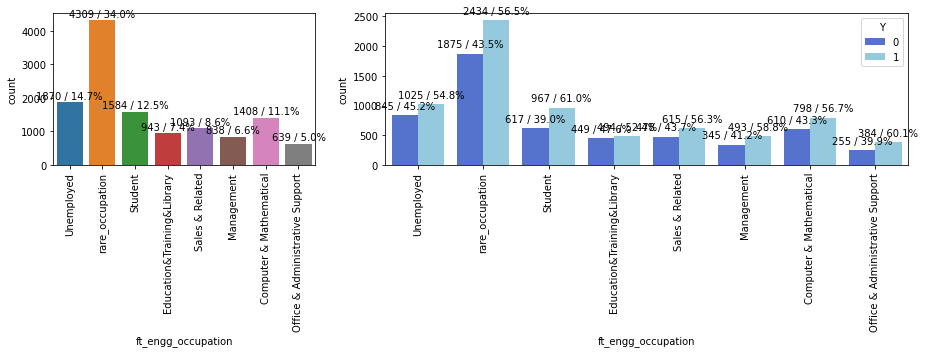

In [ ]:
plot_count_standalone_and_with_target_with_rotation_90('ft_engg_occupation', 'Y', coupon_data_ft_engg_3)

Here, for **occupation**:    
1. **Student** and**Office & Administrative Support** seems to have the highest acceptance of coupons.
2. percentage acceptance amongst the occupation does not seem to be drastically different.


**Q14. How's the distribution for the coupons being accepted or not for  income 
look like?**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[1805  846 1831  857 1659 2013 1736  895 1042]


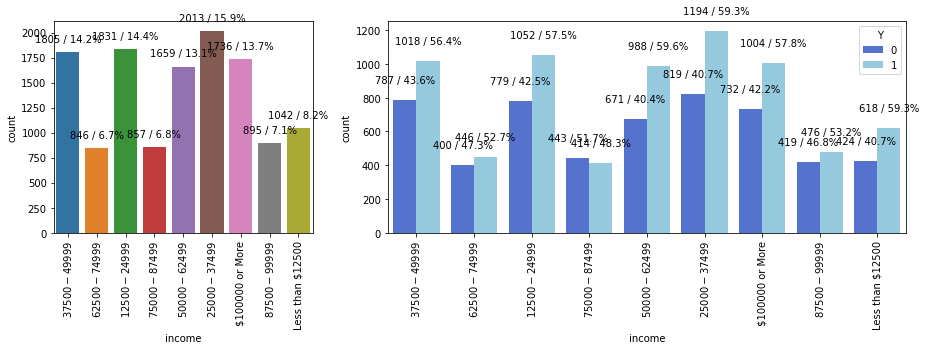

In [ ]:
# plot_count_standalone_and_with_target('income', 'Y', coupon_data_ft_engg_3)

plot_count_standalone_and_with_target_with_rotation_90('income', 'Y', coupon_data_ft_engg_3)

For **income** :     
1. coupon acceptance percentage varies between 52-59 % among all income groups.
2. Less than 12500 and 25000-37499 have highest acceptance percent.
3. 75000-87499 have higher rejection percentage.

**Q15. How's the distribution for the coupons being accepted or not for  Bar 
look like?**

In [ ]:
# Here , there are missing values, let's first assign them a caegory as missing 
# to understand their distribution and relationship with the dependent variable.
count_of_missing_values = coupon_data_ft_engg_3.isna().sum() 
percent_of_missing_values = coupon_data_ft_engg_3.isna().mean()*100

print(count_of_missing_values['Bar'],percent_of_missing_values['Bar'])
# we can see Bar has 107 missing values, that is 0.84% of the total.
# plot_count_standalone_and_with_target_with_rotation_90('Bar', 'Y', coupon_data_ft_engg_3) 

107 0.8435824660990224


In [ ]:
# Let's fill the missing values as 'Missing' category.
coupon_data_ft_engg_4= coupon_data_ft_engg_3.copy()
coupon_data_ft_engg_4['Bar'].fillna('Missing',inplace=True)

In [ ]:
# we can see now the Bar column is imputed with value as Missing category.
coupon_data_ft_engg_4.isna().sum()

print(coupon_data_ft_engg_4.isna().sum()['Bar'])

0


In [ ]:
coupon_data_ft_engg_4['Bar'].value_counts()

never      5197
less1      3482
1~3        2473
4~8        1076
gt8         349
Missing     107
Name: Bar, dtype: int64

[5197 3482 2473  349  107 1076]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


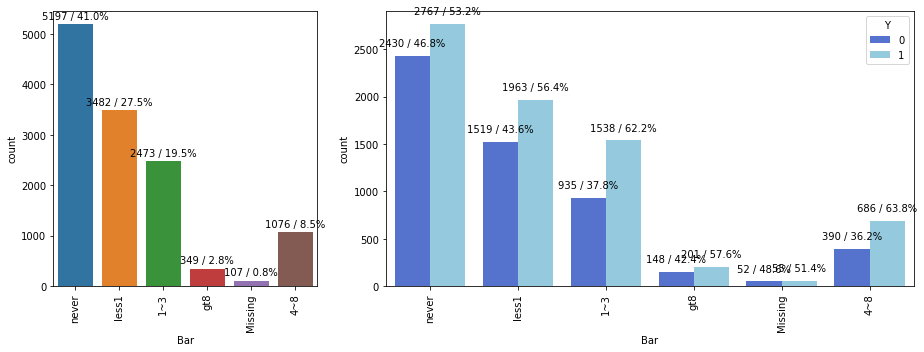

In [ ]:
# Let's plot and see the variable distribution and its relationship with the dependent variable.
plot_count_standalone_and_with_target_with_rotation_90('Bar', 'Y', coupon_data_ft_engg_4)

For the **Bar** :    
1. 1-3 and 4-8 category behavior seems to be very similar -- **gives rise to intuition as people who are frequentists to the bar are more likely to accept the coupons**. So kind of giving way to thought process of **clubbing the 3 categories** **(1-3, 4-8 and gt8)**.
2. Missing category almost have equal likely chances for accpetance as well as rejection; so it seems it can be clubbed with any of the categories.
3. less1 and never however by definition seems to be one category itself but looking at the data they have 3% more change of acccepting the coupon than those of never category - the never category data units are 41% and less1 are 27.5 ; so kind of seems if more data points are collected the percentage might seem similar- so kind of **clubbing the categories (never and less1)** could also be a potential feature engineering that can be considered.

In [ ]:
# clubbing the Bar categories:
# (1~3, 4~8, gt8 into frequentists)
# (never and less1 and Missing into almostnever)
coupon_data_ft_engg_4.loc[(coupon_data_ft_engg_4.Bar.isin(['1~3','4~8','gt8'])), 'ft_engg_Bar'] = 'frequentists'
coupon_data_ft_engg_4.loc[(coupon_data_ft_engg_4.Bar.isin(['never','less1','Missing'])), 'ft_engg_Bar'] = 'almostnever'

print(coupon_data_ft_engg_4['ft_engg_Bar'].value_counts(), coupon_data_ft_engg_4['ft_engg_Bar'].value_counts().sum())


almostnever     8786
frequentists    3898
Name: ft_engg_Bar, dtype: int64 12684


[8786 3898]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


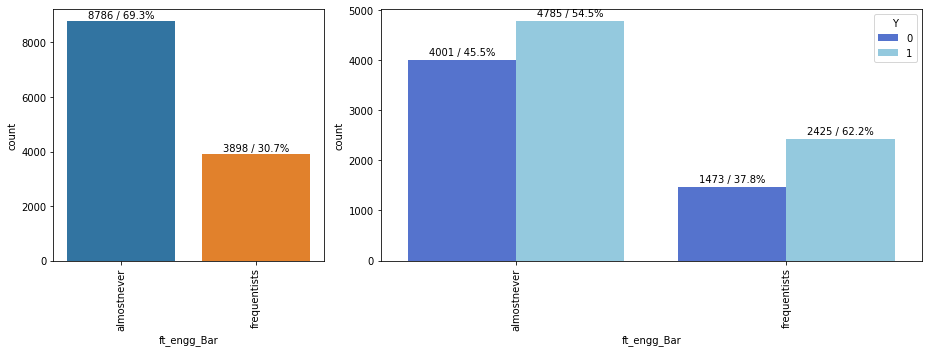

In [ ]:
plot_count_standalone_and_with_target_with_rotation_90('ft_engg_Bar', 'Y', coupon_data_ft_engg_4)

For **ft_engg_Bar** :     
1. The distribution of the data points are 70 to 30 %; kind of skewed distribution.
2. frequentisits have the 8% more chances of coupon acceptance than almostnever.

**Q16. How's the distribution for the coupons being accepted or not for  CoffeeHouse 
look like?**

In [ ]:
# First of all CoffeeHouse contains Missing values.
# Let's impute the Missing values with 'Missing' category.
# and understand the distribution and then probably we will impute it with some other value as per the analysis.

print(coupon_data_ft_engg_4['CoffeeHouse'].isna().sum())
print(coupon_data_ft_engg_4['CoffeeHouse'].value_counts())

217
less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: CoffeeHouse, dtype: int64


In [ ]:
# Let's fill the missing values as 'Missing' category.
coupon_data_ft_engg_5= coupon_data_ft_engg_4.copy()
coupon_data_ft_engg_5['CoffeeHouse'].fillna('Missing',inplace=True)

In [ ]:
coupon_data_ft_engg_5['CoffeeHouse'].isna().sum()

0

[2962 3385 1784 3225 1111  217]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


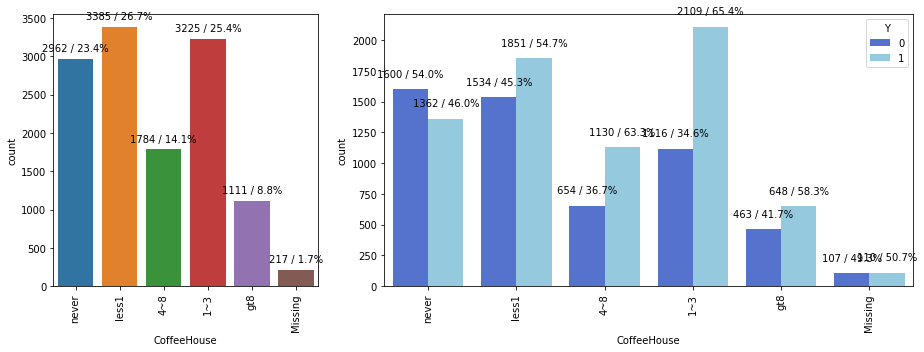

In [ ]:
plot_count_standalone_and_with_target_with_rotation_90('CoffeeHouse', 'Y', coupon_data_ft_engg_5)

The above again shows the similar understanding we developed for the Bar variable.
Doing similar transforamtions:
1. Categories **1-3, 4-8 and gt8** to be merged together as frequentists
2. Categories **never, less1 and Missing** to be merged together as almostnever.

In [ ]:
coupon_data_ft_engg_5.loc[coupon_data_ft_engg_5.CoffeeHouse.isin(['1~3','4~8','gt8']), 'ft_engg_CoffeeHouse'] = 'frequentists'
coupon_data_ft_engg_5.loc[coupon_data_ft_engg_5.CoffeeHouse.isin(['never','less1','Missing']), 'ft_engg_CoffeeHouse'] = 'almostnever'

In [ ]:
print(coupon_data_ft_engg_5['ft_engg_CoffeeHouse'].value_counts(), coupon_data_ft_engg_5['ft_engg_CoffeeHouse'].value_counts().sum())

print(coupon_data_ft_engg_5.loc[coupon_data_ft_engg_5.CoffeeHouse.isin(['1~3','4~8','gt8']), 'CoffeeHouse'].value_counts().sum())
print(coupon_data_ft_engg_5.loc[coupon_data_ft_engg_5.CoffeeHouse.isin(['never','less1','Missing']), 'CoffeeHouse'].value_counts().sum())

almostnever     6564
frequentists    6120
Name: ft_engg_CoffeeHouse, dtype: int64 12684
6120
6564


[6564 6120]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


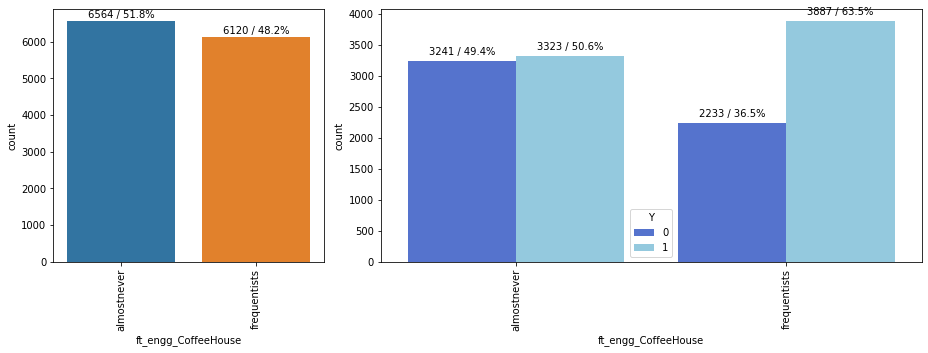

In [ ]:
plot_count_standalone_and_with_target_with_rotation_90('ft_engg_CoffeeHouse', 'Y', coupon_data_ft_engg_5)

For **ft_engg_CoffeeHouse** :     
1. The representation of both the categories are similar (51% / 48%).
2. The frequentists have a high acceptance % than the almostnevers by over 13%.
3. It seems to be a pretty significant variable in predicting the coupon acceptance.

**Q17. How's the distribution for the coupons being accepted or not for  CarryAway look like?**

In [ ]:
# Here, we know the data is missing so let's impute  as usually been followed the 'Missing' category for missing values.
# And then based on the distribution we will seek what value the Missing category to be provided.
coupon_data_ft_engg_6 = coupon_data_ft_engg_5.copy()
print(coupon_data_ft_engg_6['CarryAway'].value_counts(), coupon_data_ft_engg_6['CarryAway'].isna().sum())


1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
Name: CarryAway, dtype: int64 151


In [ ]:
# imputing the category Missing for missing values.
coupon_data_ft_engg_6['CarryAway'].fillna('Missing', inplace=True)
print(coupon_data_ft_engg_6['CarryAway'].value_counts(), coupon_data_ft_engg_6['CarryAway'].isna().sum())


1~3        4672
4~8        4258
less1      1856
gt8        1594
never       153
Missing     151
Name: CarryAway, dtype: int64 0


[ 151 4258 4672 1594 1856  153]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


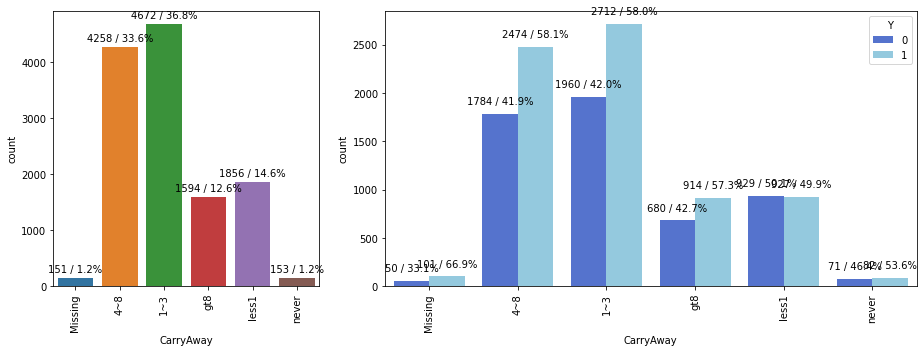

In [ ]:
plot_count_standalone_and_with_target_with_rotation_90('CarryAway', 'Y', coupon_data_ft_engg_6)

For **CarryAway** :     
1. The data for Missing is only 1.2% and the similar is for never; but here the acceptance % is pretty high 67% as against the 53.6% for never.But with such low volume nothing deterministic can be brought out.
2. Carrying out the similar clubbing as done for earlier 2 variables.
Doing similar transformations:
1. Categories **1-3, 4-8 and gt8** to be merged together as frequentists
2. Categories **never, less1 and Missing** to be merged together as almostnever.

In [ ]:
coupon_data_ft_engg_6.loc[(coupon_data_ft_engg_6.CarryAway.isin(['1~3','4~8','gt8'])), 'ft_engg_CarryAway'] = 'frequentists'
coupon_data_ft_engg_6.loc[(coupon_data_ft_engg_6.CarryAway.isin(['never','less1','Missing'])), 'ft_engg_CarryAway'] = 'almostnever'

In [ ]:
print(coupon_data_ft_engg_6['ft_engg_CarryAway'].value_counts(), coupon_data_ft_engg_6['ft_engg_CarryAway'].value_counts().sum())

print(coupon_data_ft_engg_6.loc[coupon_data_ft_engg_6.CarryAway.isin(['1~3','4~8','gt8']), 'CarryAway'].value_counts().sum())
print(coupon_data_ft_engg_6.loc[coupon_data_ft_engg_6.CarryAway.isin(['never','less1','Missing']), 'CarryAway'].value_counts().sum())

frequentists    10524
almostnever      2160
Name: ft_engg_CarryAway, dtype: int64 12684
10524
2160


[ 2160 10524]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


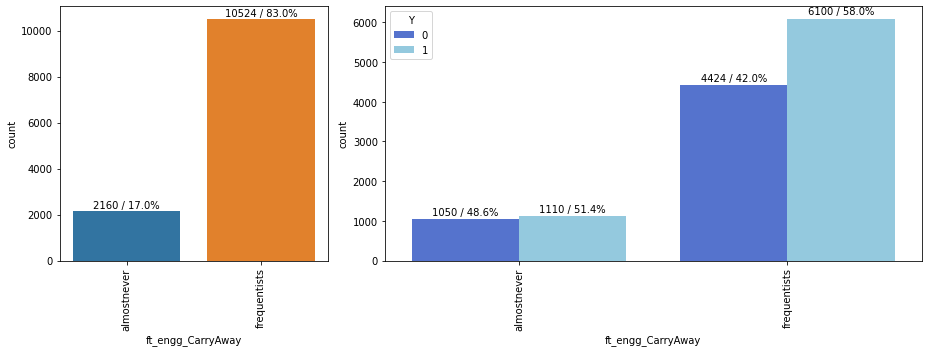

In [ ]:
plot_count_standalone_and_with_target_with_rotation_90('ft_engg_CarryAway', 'Y', coupon_data_ft_engg_6)

For **ft_engg_CarryAway**  :     
1. The class almostnever is moderately balanced for accepting/ rejecting a coupon (50-50 chance) hence not a good predictor.
2. The frequentists offer 16% more chances of a coupon been accepted than rejected. Overall 68% frequentists accept coupons.
3. So , while doing one-hot encoding , only the class frequentists can be kept removing the almostnever class.

**Q18. How's the distribution for the coupons being accepted or not for  RestaurantLessThan20 look like?**

In [ ]:
# Here, we know the data is missing so let's impute  as usually been followed the 'Missing' category for missing values.
# And then based on the distribution we will seek what value the Missing category to be provided.
coupon_data_ft_engg_7 = coupon_data_ft_engg_6.copy()
print(coupon_data_ft_engg_7['RestaurantLessThan20'].value_counts(), coupon_data_ft_engg_7['RestaurantLessThan20'].isna().sum())

1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
Name: RestaurantLessThan20, dtype: int64 130


In [ ]:
# imputing the category Missing for missing values.
coupon_data_ft_engg_7['RestaurantLessThan20'].fillna('Missing', inplace=True)
print(coupon_data_ft_engg_7['RestaurantLessThan20'].value_counts(), coupon_data_ft_engg_7['RestaurantLessThan20'].isna().sum(), coupon_data_ft_engg_7['RestaurantLessThan20'].value_counts().sum())

1~3        5376
4~8        3580
less1      2093
gt8        1285
never       220
Missing     130
Name: RestaurantLessThan20, dtype: int64 0 12684


[3580 5376 2093 1285  130  220]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


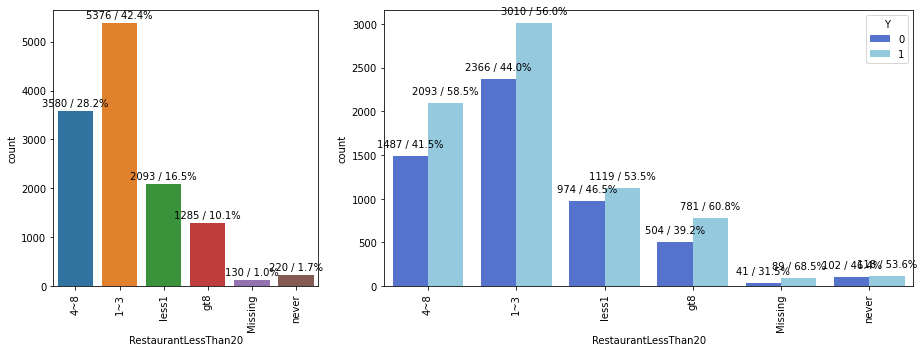

In [ ]:
plot_count_standalone_and_with_target_with_rotation_90('RestaurantLessThan20', 'Y', coupon_data_ft_engg_7)

For **RestaurantLessThan20** :

The data for Missing is only 1% and the similar is for never 1.7%; but here the acceptance % is pretty high 68.5% as against the 53.6% for never.But with such low volume nothing deterministic can be brought out.
Carrying out the similar clubbing as done for earlier 2 variables. Doing similar transformations:
Categories 1-3, 4-8 and gt8 to be merged together as frequentists
Categories never, less1 and Missing to be merged together as almostnever.

In [ ]:
coupon_data_ft_engg_7.loc[(coupon_data_ft_engg_7.RestaurantLessThan20.isin(['1~3','4~8','gt8'])), 'ft_engg_RestaurantLessThan20'] = 'frequentists'
coupon_data_ft_engg_7.loc[(coupon_data_ft_engg_7.RestaurantLessThan20.isin(['never','less1','Missing'])), 'ft_engg_RestaurantLessThan20'] = 'almostnever'


In [ ]:
print(coupon_data_ft_engg_7['ft_engg_RestaurantLessThan20'].value_counts(), coupon_data_ft_engg_7['ft_engg_RestaurantLessThan20'].value_counts().sum())


frequentists    10241
almostnever      2443
Name: ft_engg_RestaurantLessThan20, dtype: int64 12684


In [ ]:
print(coupon_data_ft_engg_7.loc[coupon_data_ft_engg_7.RestaurantLessThan20.isin(['1~3','4~8','gt8']), 'RestaurantLessThan20'].value_counts().sum())
print(coupon_data_ft_engg_7.loc[coupon_data_ft_engg_7.RestaurantLessThan20.isin(['never','less1','Missing']), 'RestaurantLessThan20'].value_counts().sum())

10241
2443


[10241  2443]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


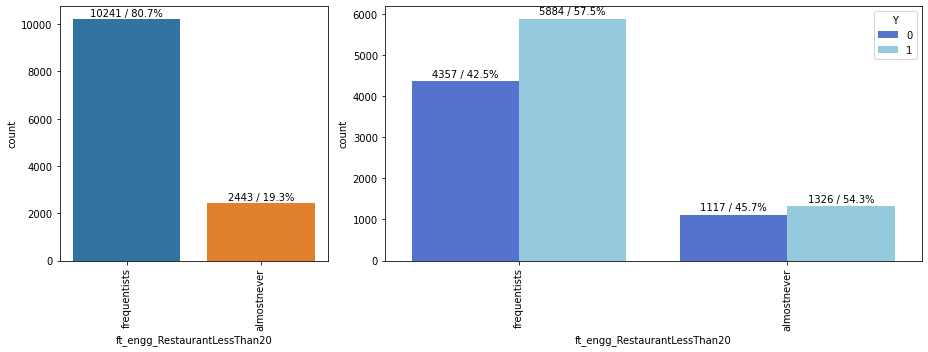

In [ ]:
plot_count_standalone_and_with_target_with_rotation_90('ft_engg_RestaurantLessThan20', 'Y', coupon_data_ft_engg_7)


For **ft_engg_RestaurantLessThan20** :      
1. The distribution of the class in this variable are pretty skewed.
2. Still there is not way ward difference in the percentage of coupon acceptance seems similar 57.5 / 54.3.
3. Does NOT seem to be a fine predictor.

**Q19. How's the distribution for the coupons being accepted or not for  Restaurant20To50 look like?**

In [ ]:
# Here, we know the data is missing so let's impute  as usually been followed the 'Missing' category for missing values.
# And then based on the distribution we will seek what value the Missing category to be provided.
coupon_data_ft_engg_8 = coupon_data_ft_engg_7.copy()
print(coupon_data_ft_engg_8['Restaurant20To50'].value_counts(), coupon_data_ft_engg_8['Restaurant20To50'].isna().sum())

less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
Name: Restaurant20To50, dtype: int64 189


In [ ]:
# imputing the category Missing for missing values.
coupon_data_ft_engg_8['Restaurant20To50'].fillna('Missing', inplace=True)
print(coupon_data_ft_engg_8['Restaurant20To50'].value_counts(), coupon_data_ft_engg_8['Restaurant20To50'].isna().sum())

less1      6077
1~3        3290
never      2136
4~8         728
gt8         264
Missing     189
Name: Restaurant20To50, dtype: int64 0


[3290 6077 2136  264  728  189]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


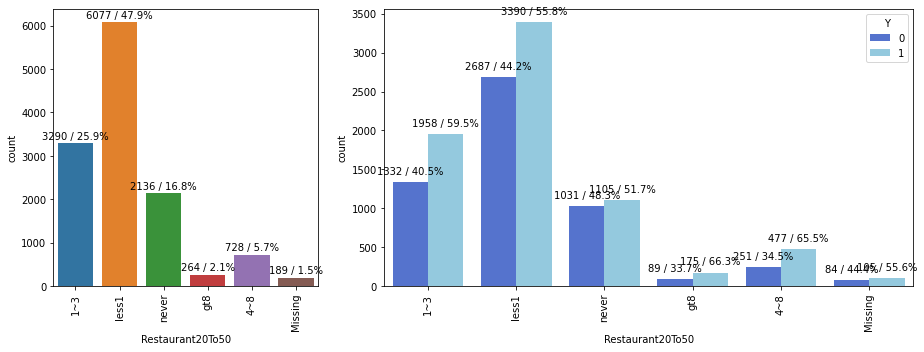

In [ ]:
plot_count_standalone_and_with_target_with_rotation_90('Restaurant20To50', 'Y', coupon_data_ft_engg_8)

For **Restaurant20To50** :

The data for Missing is only 1.5% .With such low volume nothing deterministic can be brought out.
Carrying out the similar clubbing as done for earlier 2 variables. Doing similar transformations:
Categories 1-3, 4-8 and gt8 to be merged together as frequentists
Categories never, less1 and Missing to be merged together as almostnever.


In [ ]:
coupon_data_ft_engg_8.loc[(coupon_data_ft_engg_8.Restaurant20To50.isin(['1~3','4~8','gt8'])), 'ft_engg_Restaurant20To50'] = 'frequentists'
coupon_data_ft_engg_8.loc[(coupon_data_ft_engg_8.Restaurant20To50.isin(['never','less1','Missing'])), 'ft_engg_Restaurant20To50'] = 'almostnever'

In [ ]:
print(coupon_data_ft_engg_8['ft_engg_Restaurant20To50'].value_counts(), coupon_data_ft_engg_8['ft_engg_Restaurant20To50'].value_counts().sum())

almostnever     8402
frequentists    4282
Name: ft_engg_Restaurant20To50, dtype: int64 12684


In [ ]:
print(coupon_data_ft_engg_8.loc[coupon_data_ft_engg_8.CoffeeHouse.isin(['1~3','4~8','gt8']), 'Restaurant20To50'].value_counts().sum())
print(coupon_data_ft_engg_8.loc[coupon_data_ft_engg_8.CoffeeHouse.isin(['never','less1','Missing']), 'Restaurant20To50'].value_counts().sum())

6120
6564


[4282 8402]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


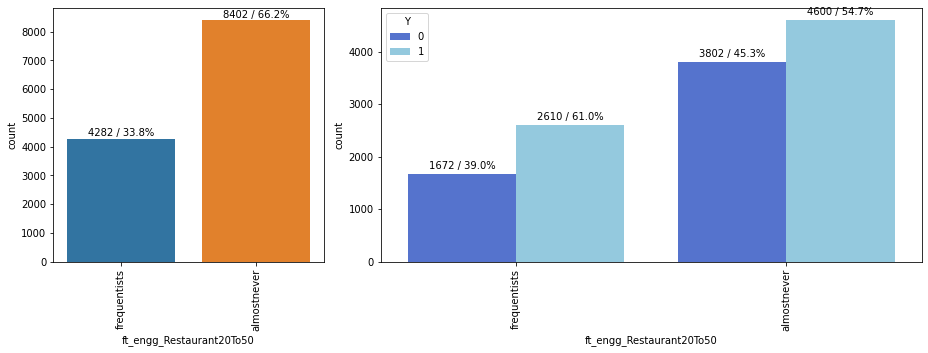

In [ ]:
plot_count_standalone_and_with_target_with_rotation_90('ft_engg_Restaurant20To50', 'Y', coupon_data_ft_engg_8)

For **ft_engg_Restaurant20To50**  :     
1. The frequentists offer 32% more chances of a coupon been accepted than rejected. Overall 61% frequentists accept coupons.
3. So , while doing one-hot encoding , only the class frequentists can be kept removing the almostnever class.

**Q20. How's the distribution for the coupons being accepted or not for  toCoupon_GEQ5min look like?**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[12684]


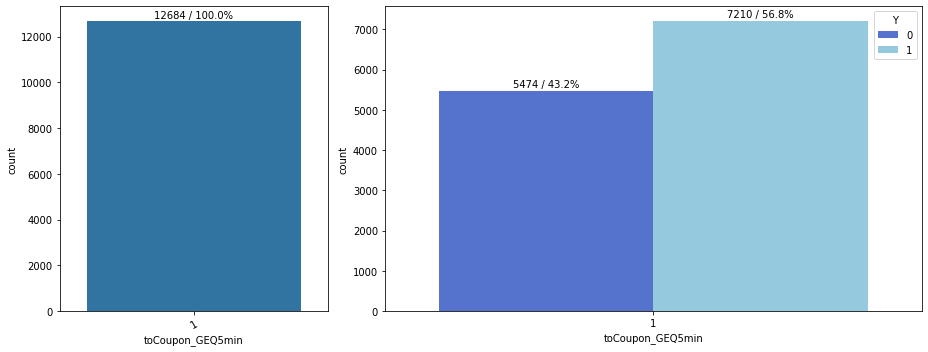

In [ ]:
plot_count_standalone_and_with_target('toCoupon_GEQ5min', 'Y', coupon_data_ft_engg_8)

For **toCoupon_GEQ5min**  :    
1. There is only one class value present for this and presence of it has 57% chances of accepting the coupon.
2. It also hints at if the distance is less than 5 mins then there is 43.2% chance of a coupon been accepted;  i.e. at such a near distance the coupon conversion is not that obvious and great.

**Q21. How's the distribution for the coupons being accepted or not for  toCoupon_GEQ15min look like?** 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[5562 7122]


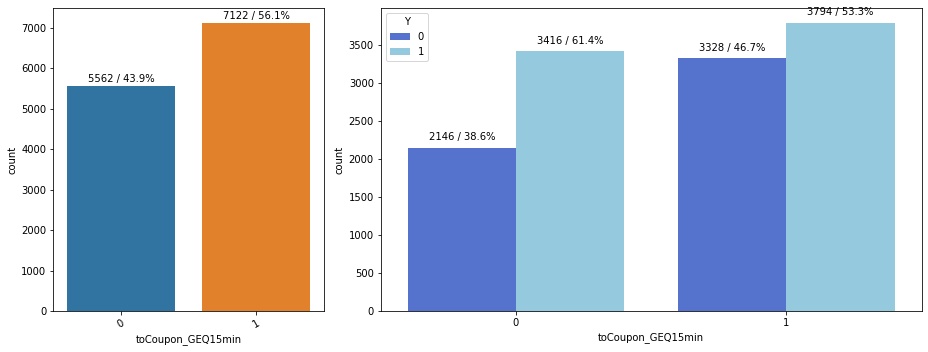

In [ ]:
plot_count_standalone_and_with_target('toCoupon_GEQ15min', 'Y', coupon_data_ft_engg_8)

For **toCoupon_GEQ15min** :     
1. If the time taken is less than 15 mins (but greater than 5 mins as was denoted by earlier variable) i.e. there is 61.4 % chance of a coupon been accepted.

**Q22. How's the distribution for the coupons being accepted or not for  toCoupon_GEQ25min look like?** 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[11173  1511]


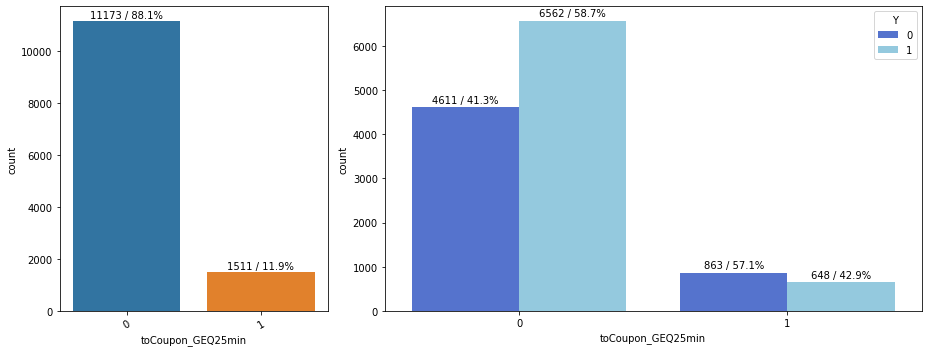

In [ ]:
plot_count_standalone_and_with_target('toCoupon_GEQ25min', 'Y', coupon_data_ft_engg_8)

For **toCoupon_GEQ25min** :    
1. If the distance is more than 15mins and less than 25 mins then the chance of coupon conversion is 58.7%.
2. But if it is farther then the chances of rejection are more.
3. in the light of previous variable the greatest chances of coupon converted is given by if the distance is less than 15 mins but more than 5 mins ; ie. it is moderately far-off.

**Q23. How's the distribution for the coupons being accepted or not for  direction_same look like?** 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[9960 2724]


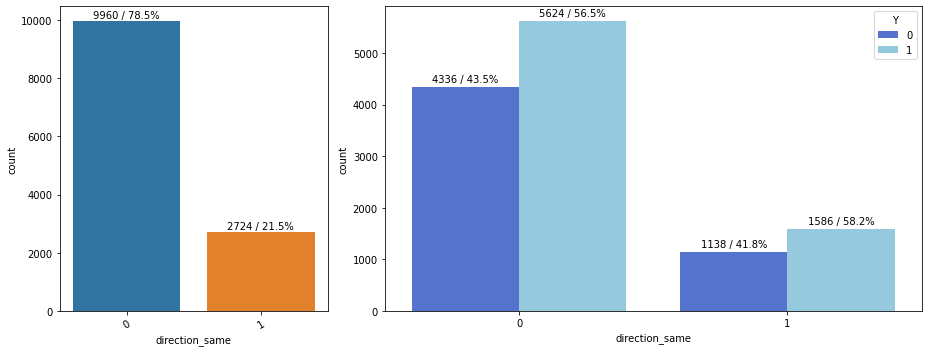

In [ ]:
plot_count_standalone_and_with_target('direction_same', 'Y', coupon_data_ft_engg_8)

For **direction_same**:    
1. whether it is in the same direction or not the chances are more or less the same 50-50.

**Q24. How's the distribution for the coupons being accepted or not for  direction_opp look like?** However this is covered as part of the previous variable itself; just confirming once again to validate the understanding.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[2724 9960]


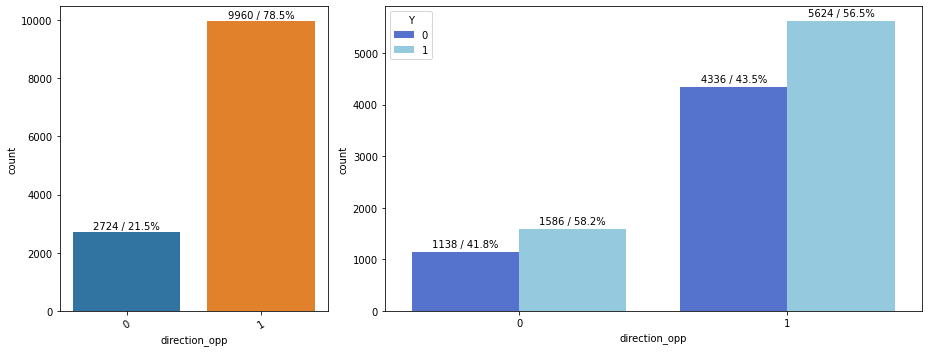

In [ ]:
plot_count_standalone_and_with_target('direction_opp', 'Y', coupon_data_ft_engg_8)

For **direction_opp**:  as expected its just the inverse of direction_same  
1. whether it is in the opp direction or not the chances are more or less the same 50-50.

## Section **4.3** : Some feature engineering that was left as per the EDA done earlier.

Here, following variables are engineered which were left done while were discovered above during EDA.
1. passenger - merging Kids and Partner
2. weather - merging Rainy and Snowy
3. destination - merging Home and Work.
4. time - merging 10 PM and 7 AM.
5. coupon - merging CoffeeHouse and Restaurant('<'20) and merging Bar and Restaurant(20-50).

In [ ]:
# Taking the latest engineered dataset.
# This already contains the following 8 columns engineered:
# ft_engg_age_binned, ft_engg_education, ft_engg_occupation, ft_engg_Bar
# ,ft_engg_CoffeeHouse, ft_engg_CarryAway, ft_engg_RestaurantLessThan20, ft_engg_Restaurant20To50
coupon_data_ft_engg_8.head(2)

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,ft_engg_age_binned,ft_engg_education,ft_engg_occupation,ft_engg_Bar,ft_engg_CoffeeHouse,ft_engg_CarryAway,ft_engg_RestaurantLessThan20,ft_engg_Restaurant20To50
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,Missing,4~8,1~3,1,0,0,0,1,1,21-30,SomeColl&HighSchGrad,Unemployed,almostnever,almostnever,almostnever,frequentists,frequentists
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,Missing,4~8,1~3,1,0,0,0,1,0,21-30,SomeColl&HighSchGrad,Unemployed,almostnever,almostnever,almostnever,frequentists,frequentists


In [ ]:
coupon_data_ft_engg_9 = coupon_data_ft_engg_8.copy()

In [ ]:
# engineering passenger column
coupon_data_ft_engg_9['passenger'].value_counts()

Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: passenger, dtype: int64

In [ ]:
# Naming the merged column (Kid(s),Partner) as family.
coupon_data_ft_engg_9.loc[(coupon_data_ft_engg_9.passenger.isin(['Kid(s)','Partner'])),'ft_engg_passenger'] = 'family'
coupon_data_ft_engg_9.loc[(coupon_data_ft_engg_9['passenger'] =='Friend(s)'),'ft_engg_passenger'] = 'Friend(s)'
coupon_data_ft_engg_9.loc[(coupon_data_ft_engg_9['passenger'] =='Alone'),'ft_engg_passenger'] = 'Alone'

print(coupon_data_ft_engg_9['ft_engg_passenger'].value_counts(), coupon_data_ft_engg_9['ft_engg_passenger'].value_counts().sum(), coupon_data_ft_engg_9['ft_engg_passenger'].isna().sum() )
print(coupon_data_ft_engg_9.passenger.isin(['Kid(s)','Partner']).value_counts() )



Alone        7305
Friend(s)    3298
family       2081
Name: ft_engg_passenger, dtype: int64 12684 0
False    10603
True      2081
Name: passenger, dtype: int64


In [ ]:
# engineering weather column
coupon_data_ft_engg_9['weather'].value_counts()

Sunny    10069
Snowy     1405
Rainy     1210
Name: weather, dtype: int64

In [ ]:
# Naming the merged column (Snowy,Rainy) as NonSunny.
coupon_data_ft_engg_9.loc[(coupon_data_ft_engg_9.weather.isin(['Snowy','Rainy'])),'ft_engg_weather'] = 'NonSunny'
coupon_data_ft_engg_9.loc[(coupon_data_ft_engg_9['weather'] =='Sunny'),'ft_engg_weather'] = 'Sunny'

print(coupon_data_ft_engg_9['ft_engg_weather'].value_counts(), coupon_data_ft_engg_9['ft_engg_weather'].value_counts().sum(), coupon_data_ft_engg_9['ft_engg_weather'].isna().sum() )
print(coupon_data_ft_engg_9.weather.isin(['Snowy','Rainy']).value_counts() )

Sunny       10069
NonSunny     2615
Name: ft_engg_weather, dtype: int64 12684 0
False    10069
True      2615
Name: weather, dtype: int64


In [ ]:
# engineering destination column
coupon_data_ft_engg_9['destination'].value_counts()

No Urgent Place    6283
Home               3237
Work               3164
Name: destination, dtype: int64

In [ ]:
# Naming the merged column (Home,Work) as WorkNHome.
coupon_data_ft_engg_9.loc[(coupon_data_ft_engg_9.destination.isin(['Home','Work'])),'ft_engg_destination'] = 'WorkNHome'
coupon_data_ft_engg_9.loc[(coupon_data_ft_engg_9['destination'] =='No Urgent Place'),'ft_engg_destination'] = 'No Urgent Place'

print(coupon_data_ft_engg_9['ft_engg_destination'].value_counts(), coupon_data_ft_engg_9['ft_engg_destination'].value_counts().sum(), coupon_data_ft_engg_9['ft_engg_destination'].isna().sum() )
print(coupon_data_ft_engg_9.destination.isin(['Home','Work']).value_counts() )

WorkNHome          6401
No Urgent Place    6283
Name: ft_engg_destination, dtype: int64 12684 0
True     6401
False    6283
Name: destination, dtype: int64


In [ ]:
# engineering time column
coupon_data_ft_engg_9['time'].value_counts()

6PM     3230
7AM     3164
10AM    2275
2PM     2009
10PM    2006
Name: time, dtype: int64

In [ ]:
# Naming the merged column (7AM,10PM) as 7AMor10PM.
coupon_data_ft_engg_9.loc[(coupon_data_ft_engg_9.time.isin(['7AM','10PM'])),'ft_engg_time'] = '7AMor10PM'
coupon_data_ft_engg_9.loc[(coupon_data_ft_engg_9['time'] =='6PM'),'ft_engg_time'] = '6PM'
coupon_data_ft_engg_9.loc[(coupon_data_ft_engg_9['time'] =='10AM'),'ft_engg_time'] = '10AM'
coupon_data_ft_engg_9.loc[(coupon_data_ft_engg_9['time'] =='2PM'),'ft_engg_time'] = '2PM'

print(coupon_data_ft_engg_9['ft_engg_time'].value_counts(), coupon_data_ft_engg_9['ft_engg_time'].value_counts().sum(), coupon_data_ft_engg_9['ft_engg_time'].isna().sum() )
print(coupon_data_ft_engg_9.time.isin(['7AM','10PM']).value_counts() )

7AMor10PM    5170
6PM          3230
10AM         2275
2PM          2009
Name: ft_engg_time, dtype: int64 12684 0
False    7514
True     5170
Name: time, dtype: int64


In [ ]:
# engineering coupon column
# As per the earlier EDA done on the coupon column :
# merging CoffeeHouse and Restaurant('<'20)
# merging Bar and Restaurant(20-50)
coupon_data_ft_engg_9['coupon'].value_counts()

Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: coupon, dtype: int64

In [ ]:
# Naming the merged column (Coffee House and Restaurant(<20)) as CoffeeNRestaurant(<20) and (Bar and Restaurant(20-50)) as BarNRestaurant(20-50)
coupon_data_ft_engg_9.loc[(coupon_data_ft_engg_9.coupon.isin(['Coffee House','Restaurant(<20)'])),'ft_engg_coupon'] = 'CoffeeNRestaurant(<20)'
coupon_data_ft_engg_9.loc[(coupon_data_ft_engg_9.coupon.isin(['Bar','Restaurant(20-50)'])),'ft_engg_coupon'] = 'BarNRestaurant(20-50)'

coupon_data_ft_engg_9.loc[(coupon_data_ft_engg_9['coupon'] =='Carry out & Take away'),'ft_engg_coupon'] = 'Carry out & Take away'

print(coupon_data_ft_engg_9['ft_engg_coupon'].value_counts(), coupon_data_ft_engg_9['ft_engg_coupon'].value_counts().sum(), coupon_data_ft_engg_9['ft_engg_coupon'].isna().sum() )
print(coupon_data_ft_engg_9.coupon.isin(['Coffee House','Restaurant(<20)']).value_counts(), coupon_data_ft_engg_9.coupon.isin(['Bar','Restaurant(20-50)']).value_counts() )

CoffeeNRestaurant(<20)    6782
BarNRestaurant(20-50)     3509
Carry out & Take away     2393
Name: ft_engg_coupon, dtype: int64 12684 0
True     6782
False    5902
Name: coupon, dtype: int64 False    9175
True     3509
Name: coupon, dtype: int64


## Section **4.4** : Final Datasets and Features Selected

In [ ]:
# So here, we have the final datasets prepared so far.
print('Original Dataset', coupon_data.columns) # this is the original dataset.
print('Engineered Dataset', coupon_data_ft_engg_9.columns) # this is the latest feature engineered dataset as per the EDA performed above.
# all the columns with prefix ft_engg have been newly added (13 new columns).

Original Dataset Index(['destination', 'passenger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')
Engineered Dataset Index(['destination', 'passenger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y', 'ft_engg_age_binned', 'ft_engg_education',
       'ft_engg_occupation', 'ft_engg_Bar', 'ft_engg_CoffeeHouse',
       'ft_engg_CarryAway', 'ft_engg_Re

### Section **4.4.1** : Selected Features

In [ ]:
# Based on the EDA done earlier , the following features are selected and let's try to have the first run of the algo on this set 
# and evaluate  performance of the model.
# temperature and weather could be redundant variables together - let's keep for the first run , will come back to it.
list_ft_selected_1 = ['Y', 'ft_engg_passenger', 'ft_engg_weather', 'ft_engg_destination', 'temperature', 'ft_engg_time', 'ft_engg_coupon', 'expiration'
                    , 'ft_engg_age_binned', 'ft_engg_CoffeeHouse', 'ft_engg_Restaurant20To50', 'toCoupon_GEQ15min'] # y variable included list.

print(len(list_ft_selected_1))

12


In [ ]:
coupon_data_ft_selection= coupon_data_ft_engg_9.copy()

In [ ]:
coupon_data_ft_selected_1 = coupon_data_ft_selection[list_ft_selected_1]

In [ ]:
print(coupon_data_ft_selected_1.shape)
print(coupon_data_ft_selected_1.info())

(12684, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Y                         12684 non-null  int64 
 1   ft_engg_passenger         12684 non-null  object
 2   ft_engg_weather           12684 non-null  object
 3   ft_engg_destination       12684 non-null  object
 4   temperature               12684 non-null  int64 
 5   ft_engg_time              12684 non-null  object
 6   ft_engg_coupon            12684 non-null  object
 7   expiration                12684 non-null  object
 8   ft_engg_age_binned        12684 non-null  object
 9   ft_engg_CoffeeHouse       12684 non-null  object
 10  ft_engg_Restaurant20To50  12684 non-null  object
 11  toCoupon_GEQ15min         12684 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 1.2+ MB
None


In [ ]:
coupon_data_ft_selected_1.tail()

,Y,ft_engg_passenger,ft_engg_weather,ft_engg_destination,temperature,ft_engg_time,ft_engg_coupon,expiration,ft_engg_age_binned,ft_engg_CoffeeHouse,ft_engg_Restaurant20To50,toCoupon_GEQ15min
12679,1,family,NonSunny,WorkNHome,55,6PM,Carry out & Take away,1d,21-30,almostnever,frequentists,0
12680,1,Alone,NonSunny,WorkNHome,55,7AMor10PM,Carry out & Take away,1d,21-30,almostnever,frequentists,0
12681,0,Alone,NonSunny,WorkNHome,30,7AMor10PM,CoffeeNRestaurant(<20),1d,21-30,almostnever,frequentists,0
12682,0,Alone,NonSunny,WorkNHome,30,7AMor10PM,BarNRestaurant(20-50),1d,21-30,almostnever,frequentists,1
12683,0,Alone,Sunny,WorkNHome,80,7AMor10PM,BarNRestaurant(20-50),2h,21-30,almostnever,frequentists,0


# Section **5** : Encoding the data. 

In [ ]:
# All columns except Y and toCoupon_GEQ15min need to be encoded.
# All columns can be treated categorical here, and Nominal Encoding (One-Hot) seems ok 
# , only for temperature let's do the Ordinal encoding (as we saw earlier during EDA as temp rises the coupon acceptance rate increased).
# currently for this excercise encoding first and then will split into test and train set.(however, which is not recommended)

from sklearn.preprocessing import LabelEncoder

le_enc = LabelEncoder()
temperature_encoded = le_enc.fit_transform(coupon_data_ft_selected_1['temperature']) # returns numpy array.
temperature_encoded
# here, the temperature 30,55,80 are encoded as 0,1,2 so order is preserved, as we have seen higher temp causesmore percent of coupon conservation.
# so it seems to be good order to preserve (ordinal variable).

array([1, 2, 2, ..., 0, 0, 2])

In [ ]:
le_enc.classes_

array([30, 55, 80])

In [ ]:
coupon_data_encoded_1 = coupon_data_ft_selected_1.copy()

In [ ]:
coupon_data_encoded_1.drop(labels='temperature', axis=1, inplace=True)

In [ ]:
coupon_data_encoded_1['temperature'] = temperature_encoded

In [ ]:
coupon_data_encoded_1.head()

,Y,ft_engg_passenger,ft_engg_weather,ft_engg_destination,ft_engg_time,ft_engg_coupon,expiration,ft_engg_age_binned,ft_engg_CoffeeHouse,ft_engg_Restaurant20To50,toCoupon_GEQ15min,temperature
0,1,Alone,Sunny,No Urgent Place,2PM,CoffeeNRestaurant(<20),1d,21-30,almostnever,frequentists,0,1
1,0,Friend(s),Sunny,No Urgent Place,10AM,CoffeeNRestaurant(<20),2h,21-30,almostnever,frequentists,0,2
2,1,Friend(s),Sunny,No Urgent Place,10AM,Carry out & Take away,2h,21-30,almostnever,frequentists,1,2
3,0,Friend(s),Sunny,No Urgent Place,2PM,CoffeeNRestaurant(<20),2h,21-30,almostnever,frequentists,1,2
4,0,Friend(s),Sunny,No Urgent Place,2PM,CoffeeNRestaurant(<20),1d,21-30,almostnever,frequentists,1,2


In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe_encoder = OneHotEncoder(categories='auto'
                            , drop='first' # to tackle multi-collinearity problems.
                            , sparse=False # to return numpy array
                            , handle_unknown='error' # to throw error in case in the test set encounters any new category not in train set.
                            )

ohe_encoder.fit(coupon_data_encoded_1.drop(labels='Y',axis=1)) # here, all other but the Y variable we want ot one hot encode.

OneHotEncoder(categories='auto', drop='first', dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=False)

In [ ]:
print(ohe_encoder.categories_)
print(coupon_data_encoded_1.columns)
# here, itis a good idea to pass the same df with the same number and order of columns those are going to be transformed so that column names 
# can be generated; else here we cna see name of colums show Y which was not a part when passed.

[array(['Alone', 'Friend(s)', 'family'], dtype=object), array(['NonSunny', 'Sunny'], dtype=object), array(['No Urgent Place', 'WorkNHome'], dtype=object), array(['10AM', '2PM', '6PM', '7AMor10PM'], dtype=object), array(['BarNRestaurant(20-50)', 'Carry out & Take away',
       'CoffeeNRestaurant(<20)'], dtype=object), array(['1d', '2h'], dtype=object), array(['0-20', '21-30', '31-40', '41-50', '51-above'], dtype=object), array(['almostnever', 'frequentists'], dtype=object), array(['almostnever', 'frequentists'], dtype=object), array([0, 1]), array([0, 1, 2])]
Index(['Y', 'ft_engg_passenger', 'ft_engg_weather', 'ft_engg_destination',
       'ft_engg_time', 'ft_engg_coupon', 'expiration', 'ft_engg_age_binned',
       'ft_engg_CoffeeHouse', 'ft_engg_Restaurant20To50', 'toCoupon_GEQ15min',
       'temperature'],
      dtype='object')


In [ ]:
from feature_engine.encoding import OneHotEncoder as fe_OneHotEncoder

In [ ]:
# here we would need to reconstruct the dataframe with column names etc if we want to explore further.
# let's use feature engine instead.

fe_ohe_enc = fe_OneHotEncoder(
    top_categories=None # this is used for if only some cats need be encoded rest all to be clubbed.
   ,variables=['ft_engg_passenger', 'ft_engg_weather', 'ft_engg_destination',  'ft_engg_time', 'ft_engg_coupon', 'expiration'
                    , 'ft_engg_age_binned', 'ft_engg_CoffeeHouse', 'ft_engg_Restaurant20To50', ] #removed temperature as it is Label encoded.
                    # removed 'Y' and 'toCoupon_GEQ15min' as it is already encoded.
   ,drop_last=True # to take care of multi-collinearity issue, or rather the last column's info is already covered   
)

fe_ohe_enc.fit(coupon_data_encoded_1) # Only the features mentioned in the encoding method above would be encoded, 
                                      # hence 'Y' is not mentioned and wont be affected.

OneHotEncoder(drop_last=True, drop_last_binary=False, ignore_format=False,
              top_categories=None,
              variables=['ft_engg_passenger', 'ft_engg_weather',
                         'ft_engg_destination', 'ft_engg_time',
                         'ft_engg_coupon', 'expiration', 'ft_engg_age_binned',
                         'ft_engg_CoffeeHouse', 'ft_engg_Restaurant20To50'])

In [ ]:
coupon_data_encoded_2 = fe_ohe_enc.transform(coupon_data_encoded_1)

In [ ]:
# So , now we have the finally encoded dataset as below.
print(coupon_data_encoded_2.shape)
coupon_data_encoded_2.head()

(12684, 19)


,Y,toCoupon_GEQ15min,temperature,ft_engg_passenger_Alone,ft_engg_passenger_Friend(s),ft_engg_weather_Sunny,ft_engg_destination_No Urgent Place,ft_engg_time_2PM,ft_engg_time_10AM,ft_engg_time_6PM,ft_engg_coupon_CoffeeNRestaurant(<20),ft_engg_coupon_Carry out & Take away,expiration_1d,ft_engg_age_binned_21-30,ft_engg_age_binned_41-50,ft_engg_age_binned_31-40,ft_engg_age_binned_51-above,ft_engg_CoffeeHouse_almostnever,ft_engg_Restaurant20To50_frequentists
0,1,0,1,1,0,1,1,1,0,0,1,0,1,1,0,0,0,1,1
1,0,0,2,0,1,1,1,0,1,0,1,0,0,1,0,0,0,1,1
2,1,1,2,0,1,1,1,0,1,0,0,1,0,1,0,0,0,1,1
3,0,1,2,0,1,1,1,1,0,0,1,0,0,1,0,0,0,1,1
4,0,1,2,0,1,1,1,1,0,0,1,0,1,1,0,0,0,1,1


# Section **6** : Splitting into Train and Test.

In [ ]:
# There are multiple ways to split - stratified, etc.
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test =  train_test_split(coupon_data_encoded_2.drop(labels='Y',axis=1), coupon_data_encoded_2['Y'], test_size=0.2, random_state=7)

In [ ]:
print(type(X_train),type(y_test))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


# Section **7** : Logistic Regression Model

In [ ]:
# importing needed libs
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

from sklearn.model_selection import GridSearchCV

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Seeking the train accuracy metrics to seek if this not the case of underfitting.
training_predictions = lr_model.predict(X_train)
print(accuracy_score(y_train,training_predictions)) # There it is , its only 67% hence underfitted, need to include more variables.

0.6649255937715581


In [ ]:
predictions = lr_model.predict(X_test)
print(type(predictions))

print(accuracy_score(y_test,predictions)) # Here, its giving 65% accuracy.
print(classification_report(y_test,predictions))

<class 'numpy.ndarray'>
0.6602286164761529
              precision    recall  f1-score   support

           0       0.63      0.52      0.57      1089
           1       0.68      0.77      0.72      1448

    accuracy                           0.66      2537
   macro avg       0.65      0.64      0.64      2537
weighted avg       0.66      0.66      0.65      2537



In [ ]:
# Let's try first the GridSearch CV on these combinations of the features.
# np.logspace(-3,3,7) expands to [1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03].
hyper_param_grid_1 = [{"C":np.logspace(-3,3,7), "penalty":["l2","none"]}
                      ,{"C":np.logspace(-3,3,7), "penalty":["l1","l2"], "solver":['liblinear']}]


In [ ]:
logreg = LogisticRegression()
logreg_gridsearch=GridSearchCV(logreg, hyper_param_grid_1, cv=5) # excluding  cv currently.

logreg_gridsearch.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                          'penalty': ['l2', 'none']},
                         {'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                          'penalty': ['l1', 'l2'], 'solver': ['liblinear']}],
             pre_dispatch='2

In [ ]:
print(logreg_gridsearch.best_estimator_)

logreg_gridsearch.best_score_

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


0.6640384862838594

## Section 7.1: Fine Tuning the Logistic Regression Model

### Section 7.1.1: Attempt 1 - Fine Tuning the Logistic Regression Model

In [ ]:
# First of all, here will try to see what is the score if the non-engineered counterparts of the selected features above would have been selected.
# Selected features in the above run that gave 66% accuracy had the following:
# 'Y', 'ft_engg_passenger', 'ft_engg_weather', 'ft_engg_destination', 'temperature', 'ft_engg_time', 'ft_engg_coupon', 'expiration'
#                     , 'ft_engg_age_binned', 'ft_engg_CoffeeHouse', 'ft_engg_Restaurant20To50', 'toCoupon_GEQ15min'

# The corresponding list of the non-engineered features are as below.
list_ft_selected_2 = ['Y', 'passenger', 'weather', 'destination', 'temperature', 'time', 'coupon', 'expiration', 'age', 'CoffeeHouse', 'Restaurant20To50', 'toCoupon_GEQ15min']


In [ ]:
# Making the dataframe with the all the selected features in it.
coupon_data_ft_selected_2 = coupon_data_ft_selection[list_ft_selected_2]
print(coupon_data_ft_selected_2.shape)
print(coupon_data_ft_selected_2.info())

(12684, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Y                  12684 non-null  int64 
 1   passenger          12684 non-null  object
 2   weather            12684 non-null  object
 3   destination        12684 non-null  object
 4   temperature        12684 non-null  int64 
 5   time               12684 non-null  object
 6   coupon             12684 non-null  object
 7   expiration         12684 non-null  object
 8   age                12684 non-null  object
 9   CoffeeHouse        12684 non-null  object
 10  Restaurant20To50   12684 non-null  object
 11  toCoupon_GEQ15min  12684 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 1.2+ MB
None


In [ ]:
# Label encoding the temperature data.
from sklearn.preprocessing import LabelEncoder

le_enc = LabelEncoder()
temperature_encoded_temp_arr = le_enc.fit_transform(coupon_data_ft_selected_2['temperature']) # returns numpy array.
temperature_encoded_temp_arr


array([1, 2, 2, ..., 0, 0, 2])

In [ ]:
# Replacing the temperature column in the dataset with this encoded column.
coupon_data_encoded_3 = coupon_data_ft_selected_2.copy()
coupon_data_encoded_3.drop(labels='temperature', axis=1, inplace=True)

coupon_data_encoded_3['temperature'] = temperature_encoded
coupon_data_encoded_3.head()

,Y,passenger,weather,destination,time,coupon,expiration,age,CoffeeHouse,Restaurant20To50,toCoupon_GEQ15min,temperature
0,1,Alone,Sunny,No Urgent Place,2PM,Restaurant(<20),1d,21,never,1~3,0,1
1,0,Friend(s),Sunny,No Urgent Place,10AM,Coffee House,2h,21,never,1~3,0,2
2,1,Friend(s),Sunny,No Urgent Place,10AM,Carry out & Take away,2h,21,never,1~3,1,2
3,0,Friend(s),Sunny,No Urgent Place,2PM,Coffee House,2h,21,never,1~3,1,2
4,0,Friend(s),Sunny,No Urgent Place,2PM,Coffee House,1d,21,never,1~3,1,2


In [ ]:
# Before encoding 'CoffeeHouse', 'Restaurant20To50', 'toCoupon_GEQ15min' we need to impute the missing values.
# imputing the values by the mode.
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

variables_to_impute = ['CoffeeHouse', 'Restaurant20To50', 'toCoupon_GEQ15min']


In [ ]:
mode_imputer = SimpleImputer(strategy='most_frequent')
mode_imputer.fit(coupon_data_encoded_3[variables_to_impute])


SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='most_frequent', verbose=0)

In [ ]:
# Learnt frequent values here.
mode_imputer.statistics_

array(['less1', 'less1', 1], dtype=object)

In [ ]:
# now, let's impute the columns by transform.
imputed_array_1 = mode_imputer.transform(coupon_data_encoded_3[variables_to_impute])
imputed_array_1

array([['never', '1~3', 0],
       ['never', '1~3', 0],
       ['never', '1~3', 1],
       ...,
       ['never', '1~3', 0],
       ['never', '1~3', 1],
       ['never', '1~3', 0]], dtype=object)

In [ ]:
# transforming the array returned to the dataframe.

# Here, again the variable not named as list caused issue, columns is passed as a list of list so it created multi-index.; 
# now here unpacked the list. and it worked fine now.
imputed_df_1 = pd.DataFrame(imputed_array_1, columns=[*variables_to_impute]) 

# hence it was coming as multi-index.

print(imputed_df_1.shape, imputed_df_1.columns)
imputed_df_1.head()


(12684, 3) Index(['CoffeeHouse', 'Restaurant20To50', 'toCoupon_GEQ15min'], dtype='object')


,CoffeeHouse,Restaurant20To50,toCoupon_GEQ15min
0,never,1~3,0
1,never,1~3,0
2,never,1~3,1
3,never,1~3,1
4,never,1~3,1


In [ ]:
# Now, we will drop the 3 columns from the main df and concat these imputed ones there.
coupon_data_encoded_3.drop(columns=variables_to_impute,axis=1,inplace=True) #variables_to_impute is itself a lists othat is why include _list at end of variable.


In [ ]:
coupon_data_encoded_3.head()

,Y,passenger,weather,destination,time,coupon,expiration,age,temperature
0,1,Alone,Sunny,No Urgent Place,2PM,Restaurant(<20),1d,21,1
1,0,Friend(s),Sunny,No Urgent Place,10AM,Coffee House,2h,21,2
2,1,Friend(s),Sunny,No Urgent Place,10AM,Carry out & Take away,2h,21,2
3,0,Friend(s),Sunny,No Urgent Place,2PM,Coffee House,2h,21,2
4,0,Friend(s),Sunny,No Urgent Place,2PM,Coffee House,1d,21,2


In [ ]:
# pd.concat([coupon_data_encoded_3,imputed_df_1],axis=1,ignore_index=True) # makes all indexes 0,1 etc
coupon_data_encoded_3 = pd.concat([coupon_data_encoded_3,imputed_df_1],axis=1) #somehow not working as needed the columns name  is enclosed in parenthessi seems like hierarchical index happens.


In [ ]:
print(coupon_data_encoded_3.shape)
coupon_data_encoded_3.head()

(12684, 12)


,Y,passenger,weather,destination,time,coupon,expiration,age,temperature,CoffeeHouse,Restaurant20To50,toCoupon_GEQ15min
0,1,Alone,Sunny,No Urgent Place,2PM,Restaurant(<20),1d,21,1,never,1~3,0
1,0,Friend(s),Sunny,No Urgent Place,10AM,Coffee House,2h,21,2,never,1~3,0
2,1,Friend(s),Sunny,No Urgent Place,10AM,Carry out & Take away,2h,21,2,never,1~3,1
3,0,Friend(s),Sunny,No Urgent Place,2PM,Coffee House,2h,21,2,never,1~3,1
4,0,Friend(s),Sunny,No Urgent Place,2PM,Coffee House,1d,21,2,never,1~3,1


In [ ]:
print(coupon_data_encoded_3.columns)

Index(['Y', 'passenger', 'weather', 'destination', 'time', 'coupon',
       'expiration', 'age', 'temperature', 'CoffeeHouse', 'Restaurant20To50',
       'toCoupon_GEQ15min'],
      dtype='object')


In [ ]:
# Now, One-Hot encoding the rest of the category variables except Y which is already encoded into 0s and 1s and temperature which is already done above.

from feature_engine.encoding import OneHotEncoder as fe_OneHotEncoder

fe_ohe_enc1 = fe_OneHotEncoder( top_categories=None
                              ,drop_last=False # currently we are not dropping the last column.
                              ,variables=['passenger', 'weather', 'destination', 'time', 'coupon', 'expiration', 'age'
                                         ,'CoffeeHouse', 'Restaurant20To50', 'toCoupon_GEQ15min']
                              )

In [ ]:
fe_ohe_enc1.fit(coupon_data_encoded_3)
print(fe_ohe_enc1.variables_,fe_ohe_enc1.variables)
print(fe_ohe_enc1.encoder_dict_) # gives the dictionary of the newer columns that have come in. 

['passenger', 'weather', 'destination', 'time', 'coupon', 'expiration', 'age', 'CoffeeHouse', 'Restaurant20To50', 'toCoupon_GEQ15min'] ['passenger', 'weather', 'destination', 'time', 'coupon', 'expiration', 'age', 'CoffeeHouse', 'Restaurant20To50', 'toCoupon_GEQ15min']
{'passenger': ['Alone', 'Friend(s)', 'Kid(s)', 'Partner'], 'weather': ['Sunny', 'Rainy', 'Snowy'], 'destination': ['No Urgent Place', 'Home', 'Work'], 'time': ['2PM', '10AM', '6PM', '7AM', '10PM'], 'coupon': ['Restaurant(<20)', 'Coffee House', 'Carry out & Take away', 'Bar', 'Restaurant(20-50)'], 'expiration': ['1d', '2h'], 'age': [21, 46, 26, 31, 41, '50plus', 36, 'below21'], 'CoffeeHouse': ['never', 'less1', '4~8', '1~3', 'gt8', 'Missing'], 'Restaurant20To50': ['1~3', 'less1', 'never', 'gt8', '4~8', 'Missing'], 'toCoupon_GEQ15min': [0, 1]}


In [ ]:
coupon_data_encoded_4=fe_ohe_enc1.transform(coupon_data_encoded_3)

In [ ]:
print(coupon_data_encoded_4.isna().sum().sum()) # no NAs.
coupon_data_encoded_4.head()

0


,Y,temperature,passenger_Alone,passenger_Friend(s),passenger_Kid(s),passenger_Partner,weather_Sunny,weather_Rainy,weather_Snowy,destination_No Urgent Place,destination_Home,destination_Work,time_2PM,time_10AM,time_6PM,time_7AM,time_10PM,coupon_Restaurant(<20),coupon_Coffee House,coupon_Carry out & Take away,coupon_Bar,coupon_Restaurant(20-50),expiration_1d,expiration_2h,age_21,age_46,age_26,age_31,age_41,age_50plus,age_36,age_below21,CoffeeHouse_never,CoffeeHouse_less1,CoffeeHouse_4~8,CoffeeHouse_1~3,CoffeeHouse_gt8,CoffeeHouse_Missing,Restaurant20To50_1~3,Restaurant20To50_less1,Restaurant20To50_never,Restaurant20To50_gt8,Restaurant20To50_4~8,Restaurant20To50_Missing,toCoupon_GEQ15min_0,toCoupon_GEQ15min_1
0,1,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
1,0,2,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
2,1,2,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
3,0,2,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
4,0,2,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1


In [ ]:
# Now, we do the train , test split.
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(coupon_data_encoded_4.drop(labels='Y',axis=1)
                                                   ,coupon_data_encoded_4['Y']
                                                   ,test_size=0.2
                                                   ,random_state=7)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(10147, 45) (2537, 45)
(10147,) (2537,)


### Section 7.1.2: Attempt *1* Logistic Regression Model Run

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [ ]:
# training the model.
lr_model_1 = LogisticRegression()
lr_model_1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# predicting the score on the train itself. First seeking the Underfit score.
predictions_1 = lr_model_1.predict(X_train)

In [ ]:
# seeking the accuracy of the predictions on the Train set itself.
print(accuracy_score(y_train, predictions_1)) # Here, its giving 68% accuracy.

0.6842416477776683


In [ ]:
# Let's see on the test.
predictions_test_1 = lr_model_1.predict(X_test)

In [ ]:
# seeking the accuracy of the predictions on the Test set itself.
print(accuracy_score(y_test, predictions_test_1)) # Here, its giving % accuracy.

0.6700827749310209


In [ ]:
# By definition a confusion matrix C is such that C_{i, j}
# is equal to the number of observations known to be in group i and
# predicted to be in group j.

# Thus in binary classification, the count of true negatives is
# C_{0,0}, false negatives is C_{1,0}, true positives is
# C_{1,1} and false positives is C_{0,1}.

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

cm = confusion_matrix(y_test, predictions_test_1)
print(cm, type(cm), type(str(cm)))
print(classification_report(y_test,predictions_test_1), type(classification_report(y_test,predictions_test_1)))

# Here, we can see the precision and recall are higher than the accuracy score.

[[ 614  475]
 [ 362 1086]] <class 'numpy.ndarray'> <class 'str'>
              precision    recall  f1-score   support

           0       0.63      0.56      0.59      1089
           1       0.70      0.75      0.72      1448

    accuracy                           0.67      2537
   macro avg       0.66      0.66      0.66      2537
weighted avg       0.67      0.67      0.67      2537
 <class 'str'>


In [ ]:
# Now, we will use GridSearchCV.

hyper_param_grid_2 = [{"C":np.logspace(-3,3,7), "penalty":["l2","none"]}
                      ,{"C":np.logspace(-3,3,7), "penalty":["l1","l2"], "solver":['liblinear']}]


In [ ]:
logreg = LogisticRegression()
logreg_gridsearch=GridSearchCV(logreg, hyper_param_grid_2, cv=5) # excluding  cv currently.

logreg_gridsearch.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                          'penalty': ['l2', 'none']},
                         {'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                          'penalty': ['l1', 'l2'], 'solver': ['liblinear']}],
             pre_dispatch='2

In [ ]:
print(logreg_gridsearch.best_estimator_, type(logreg_gridsearch.best_estimator_)) #type returns the model itself so it can be used to train , test and evaluate more scores.

print(logreg_gridsearch.best_score_)

print(logreg_gridsearch.cv_results_)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) <class 'sklearn.linear_model._logistic.LogisticRegression'>
0.6814818627439079
{'mean_fit_time': array([0.03453331, 0.0809938 , 0.06036706, 0.07733989, 0.09942203,
       0.07896786, 0.07719469, 0.07696886, 0.07565126, 0.07960582,
       0.07865534, 0.07827601, 0.07870202, 0.07834148, 0.01812868,
       0.02544389, 0.03754015, 0.03081179, 0.07952375, 0.03900371,
       0.25701542, 0.03795338, 1.13269911, 0.03767767, 0.15797243,
       0.03725052, 0.04358563, 0.03764081]), 'std_fit_time': array([0.00390982, 0.01004584, 0.01323772, 0.00822633, 0.02322083,
       0.00971334, 0.00466168, 0.00990018, 0.00664378, 0.011491  ,
       0.01014988, 0.00954569, 0.00770255, 0.01

### Section 7.1.3: Devising a function for Logistic Regression Model Run to run iterative tests.

In [ ]:
# Here, we will devise a function that will 
#        incrementally select the features from a list in the order that is provided in the list.
#        encode the variable
#        add the encoded columns to the dataframe
#        split the dataframe into train and test
#        run the logistic regression
#        enter the accuracy score and other metrics in the ordered dataframe.
# There are additional handling to be done for import statements import , so currently need to be done hardcoded fashion.
def add_variable_assess_metrics_logistic_regression(list_of_features_in_the_order
                                                  , dependent_variable_name, encoding_dict
                                                  , imputation_dict, modelling_dict
                                                  , data_df ):
  # The list of features in the order they need be taken.
  # independent variable name 
  # encoding dict contains the feature_engine encoder name as key and as value contains a dict having the parameters for that encoder.
  # imputation dict contains the feature_engine imputer name as key and as value contains the parameters for that imputer.
  # entire data frame consisting of both the Train and Test data ; and all the columns.

  # importing lib within the function to make it independent.
  import pandas as pd
  from sklearn.model_selection import train_test_split 

  dataset_operated_upon = data_df[list_of_features_in_the_order].copy() # only the list of featured dataset.
  dataset_operated_upon_target = data_df[[dependent_variable_name]].copy()

  # This is the output dataframe.
  output_df = pd.DataFrame()

  # first the imputation is done. Check if the column is to be imputed in the imputation_dict.
  if len(imputation_dict) != 0:
    # for imputer_item in imputation_dict.items():
    for imputer_key in imputation_dict:
      print(imputer_key, imputation_dict[imputer_key].get('parameters_dict',{}), imputation_dict[imputer_key].get('type','') )
      
      # imputer type.
      imputer_type = imputation_dict[imputer_key].get('type','')

      if imputer_type == 'feature_engine':
        # feature_engine returns back the dataframe ; but for sklearn numpy array is returned so accordingly handling need be done.
        # Execute the import statement.
        import_statement=imputation_dict[imputer_key].get('import_statement','')

        #The name of the variable to remain as imputer_hyper_params_dict.
        imputer_hyper_params_dict = imputation_dict[imputer_key].get('parameters_dict',{})

        # Taking the instantiation of the imputer command.
        instantiation_command = imputation_dict[imputer_key].get('instantiation_statement','')
        
        if import_statement != '':
          local_env= locals()
          exec(import_statement, None, local_env)

        if len(instantiation_command) !=0:
          print('instantiation command to be executed ', instantiation_command )
          local_env= locals()
          exec(instantiation_command, None, local_env)
          imputer_instance = local_env['instantiated_imputer']
          print('Object instantiated', imputer_instance )

          imputer_instance.fit(dataset_operated_upon)
          print(imputer_instance.imputer_dict_)

          print('Before imputation ', dataset_operated_upon.isna().sum())
          dataset_operated_upon = imputer_instance.transform(dataset_operated_upon)
          print('After imputation ', dataset_operated_upon.isna().sum())

  # second the encoding need be is done.
  if len(encoding_dict) != 0:

    for encoder_key in encoding_dict:
      print(encoder_key, encoding_dict[encoder_key].get('parameters_dict',{}), encoding_dict[encoder_key].get('type','') )
      
      # encoder type.
      encoder_type = encoding_dict[encoder_key].get('type','')  

      if encoder_type == 'feature_engine':
        # feature_engine returns back the dataframe ; but for sklearn numpy array is returned so accordingly handling need be done.
        # Execute the import statement.
        import_statement=encoding_dict[encoder_key].get('import_statement','')

        #The name of the variable to remain as encoder_hyper_params_dict.
        encoder_hyper_params_dict = encoding_dict[encoder_key].get('parameters_dict',{})

        # Taking the instantiation of the encoder command.
        instantiation_command = encoding_dict[encoder_key].get('instantiation_statement','')
        
        if import_statement != '':
          local_env= locals()
          exec(import_statement, None, local_env)        

        if len(instantiation_command) !=0:
          print('instantiation command to be executed ', instantiation_command )
          # local_env= locals()
          global_env= globals()

          exec(instantiation_command, None, global_env)
          encoder_instance = local_env['instantiated_encoder']
          print('Object instantiated', encoder_instance )

          encoder_instance.fit(dataset_operated_upon)
          print(encoder_instance.encoder_dict_)

          print('Before encoding ', len(dataset_operated_upon.columns), dataset_operated_upon.columns)
          dataset_operated_upon = encoder_instance.transform(dataset_operated_upon)
          print('After encoding ', len(dataset_operated_upon.columns), dataset_operated_upon.columns)

      if encoder_type == 'sklearn':
        # feature_engine returns back the dataframe ; but for sklearn numpy array is returned so accordingly handling need be done.
        # Execute the import statement.
        import_statement=encoding_dict[encoder_key].get('import_statement','')

        #The name of the variable to remain as encoder_hyper_params_dict.
        encoder_hyper_params_dict = encoding_dict[encoder_key].get('parameters_dict',{})

        # Taking the instantiation of the encoder command.
        instantiation_command = encoding_dict[encoder_key].get('instantiation_statement','')
        
        if import_statement != '':
          # local_env= locals()
          global_env= globals()

          exec(import_statement, None, global_env) 

        if len(instantiation_command) !=0:
          print('instantiation command to be executed ', instantiation_command )
          local_env= locals()
          exec(instantiation_command, None, local_env)
          encoder_instance = local_env['instantiated_encoder']
          print('Object instantiated', encoder_instance )

        # Now, we need to see which all variables need be encoded.
        list_of_variables = encoding_dict[encoder_key].get('variables',[])  
        
        if len(list_of_variables) !=0:

          sklearn_encoded_array = encoder_instance.fit_transform(dataset_operated_upon[list_of_variables])  # only for those list of variables.
          print(encoder_instance.classes_)
          # Now, we transform the array into dataframe.
          sklearn_encoded_df = pd.DataFrame(data=sklearn_encoded_array , columns=list_of_variables)

          print(sklearn_encoded_df.head(), sklearn_encoded_df.tail())

          # NOw, we concat this above df to our main df dataset_operated_upon by dropping these labelencoded columns from the dataset.
          dataset_operated_upon.drop(labels=list_of_variables, axis=1, inplace=True)
          dataset_operated_upon = pd.concat([dataset_operated_upon, sklearn_encoded_df], axis=1 )

          print(dataset_operated_upon[list_of_variables].head(), dataset_operated_upon[list_of_variables].tail())

  # third the train test split need be done.
  # first lets concat independent and dependent features dfs
  complete_dataset_operated_upon = pd.concat([dataset_operated_upon, dataset_operated_upon_target], axis=1)
  X_train, X_test, y_train, y_test = train_test_split(complete_dataset_operated_upon.drop(labels=dependent_variable_name, axis=1)
                                                     ,complete_dataset_operated_upon[dependent_variable_name]
                                                     ,test_size=0.2
                                                     ,random_state=7)
  print('X_train_shape', X_train.shape)
  print('X_test_shape', X_test.shape)

  # fourth the encoding need be is done.
  if len(modelling_dict) != 0:

    for model_key in modelling_dict:
      print(model_key, modelling_dict[model_key].get('import_statement_list',[]), modelling_dict[model_key].get('type','') )
  
      # encoder type.
      model_type = modelling_dict[model_key].get('type','')  

      if model_type == 'sklearn':
        # this was different libs can also be made use of.
        import_statement_list=modelling_dict[model_key].get('import_statement_list',[])

        # Taking the instantiation of the encoder command.
        instantiation_command = modelling_dict[model_key].get('instantiation_statement','')

        # Seeking if the GridSearchCV is present.
        GridSearchCV_list = modelling_dict[model_key].get('GridSearchCV',[])
        
        if len(import_statement_list) != 0:
          for import_statement in import_statement_list:
            # local_env= locals()
            global_env= globals()
            exec(import_statement, None, global_env)  # for import statements it is the globals those need be passed so that import brings it for other execs in global env as well.

        if len(GridSearchCV_list) != 0:
          hyper_params_grid_list = GridSearchCV_list

          # time to run the model. let's instantiate it.
          # currently assuming gridsearch is avaialble then only the model will be executed.
          if len(instantiation_command) !=0:
            print('instantiation command to be executed ', instantiation_command )
            local_env= locals()
            exec(instantiation_command, None, local_env)
            model_instance = local_env['model']
            print('Object instantiated', model_instance )

            model_gridsearch = GridSearchCV(estimator=model_instance, param_grid=GridSearchCV_list, cv=3 ) # only stating cv=3 for now.
            model_gridsearch.fit(X_train,y_train)

            model_gridsearch_best_score = model_gridsearch.best_score_
            print('Best score', model_gridsearch_best_score)
            print('Best model', model_gridsearch.best_estimator_)


            model_best_estimator = model_gridsearch.best_estimator_
            model_best_estimator.fit(X_train,y_train)

            predictions_train = model_best_estimator.predict(X_train)

            model_accuracy_score_train = accuracy_score(y_train, predictions_train)
            model_confusion_matrix_train = str(confusion_matrix(y_train, predictions_train))  
            model_precision_train, model_recall_train, model_f1_train, model_support_train = precision_recall_fscore_support(y_train
                                                                                                                             ,predictions_train
                                                                                                                             ,labels=[0,1]
                                                                                                                             ,beta=1) # beta signifies f1 or f2 or sm othe weight

            print('Accuracy Score', model_accuracy_score_train)

            # test scores:
            predictions_test = model_best_estimator.predict(X_test)

            model_accuracy_score_test = accuracy_score(y_test, predictions_test)
            model_confusion_matrix_test = str(confusion_matrix(y_test, predictions_test))  
            model_precision_test, model_recall_test, model_f1_test, model_support_test = \
            precision_recall_fscore_support(y_test 
                                            ,predictions_test
                                            ,labels=[0,1]
                                             ,beta=1) # beta signifies f1 or f2 or sm othe weight

            print('Accuracy Score', model_accuracy_score_test)

            output_dict={}

            # there cud be same model in the modelling dict - it cat be has to be a differnt name as its dict.
            output_dict['model_key'] = model_key
            output_dict['list_of_features_in_the_order'] = list_of_features_in_the_order
            output_dict['count_of_independent_variables'] = len(list_of_features_in_the_order)
            

            output_dict['gridsearch_best_score'] = model_gridsearch_best_score
            output_dict['gridsearch_best_model'] = model_best_estimator

            output_dict['Train-accuracy_score'] = model_accuracy_score_train
            output_dict['Train-confusion_matrix'] = model_confusion_matrix_train

            output_dict['Train-precision-0'] = model_precision_train[0] # since we mentioned in labels in the function precision_recall_fscore_support first as 0 hence its 0 first
            output_dict['Train-precision-1'] = model_precision_train[1]  

            output_dict['Train-recall-0'] = model_recall_train[0]
            output_dict['Train-recall-1'] = model_recall_train[1]

            output_dict['Train-f1-0'] = model_f1_train[0]
            output_dict['Train-f1-1'] = model_f1_train[1]

            output_dict['Train-support-0'] = model_support_train[0]
            output_dict['Train-support-1'] = model_support_train[1]

            # Test

            output_dict['Test-accuracy_score'] = model_accuracy_score_test
            output_dict['Test-confusion_matrix'] = model_confusion_matrix_test

            output_dict['Test-precision-0'] = model_precision_test[0] # since we mentioned in labels in the function precision_recall_fscore_support first as 0 hence its 0 first
            output_dict['Test-precision-1'] = model_precision_test[1]  

            output_dict['Test-recall-0'] = model_recall_test[0]
            output_dict['Test-recall-1'] = model_recall_test[1]

            output_dict['Test-f1-0'] = model_f1_test[0]
            output_dict['Test-f1-1'] = model_f1_test[1]

            output_dict['Test-support-0'] = model_support_test[0]
            output_dict['Test-support-1'] = model_support_test[1]

            print(output_dict)

            output_df = output_df.append(output_dict, ignore_index=True)

  return output_df


In [ ]:
original_dataset_df = coupon_data.copy()

list_of_features_in_the_order = ['passenger', 'weather', 'destination', 'temperature', 'time', 'coupon', 'expiration', 'age', 'CoffeeHouse', 'Restaurant20To50', 'toCoupon_GEQ15min']
dependent_variable_name = 'Y'
encoding_dict = {
                  'OneHotEncoder':{'type': 'feature_engine'
                                  ,'import_statement':'from feature_engine.encoding import OneHotEncoder as fe_OHE'
                                   # keep the name as instantiated_encoder in the instantiation_statement.
                                   # if hyper params are not there then remove the **encoder_hyper_params_dict and only keep ().                                  
                                  ,'instantiation_statement':'instantiated_encoder = fe_OHE(**encoder_hyper_params_dict)' 
                                  ,'parameters_dict':{ 'top_categories':None
                                                     , 'drop_last':False
                                                     , 'variables':['passenger', 'weather', 'destination', 'time', 'coupon', 'expiration', 'age', 'CoffeeHouse', 'Restaurant20To50'] #, 'toCoupon_GEQ15min' is already encoded in 0/1 hence not keeping, if numerical need be included pass ignore_format=True as was in imputer.
                                                      }
                                   }
                 ,'LabelEncoder':{'type': 'sklearn'
                                  ,'import_statement':'from sklearn.preprocessing import LabelEncoder'
                                   # keep the name as instantiated_encoder in the instantiation_statement.
                                   # if hyper params are not there then remove the **encoder_hyper_params_dict and only keep ().                                  
                                  ,'instantiation_statement':'instantiated_encoder = LabelEncoder()'      # no hyper params for this.  
                                  # for sklearn type variables need be here as a list of columns to be LabelEncoded.          
                                  ,'variables':['temperature'] # need variables here, as only these variables will be encoded , this is for sklearn LabelEncoding.
                                  }
                }

imputation_dict = {
                   'CategoricalImputer':{'type': 'feature_engine'
                                        ,'import_statement':'from feature_engine.imputation import CategoricalImputer'
                                        # keep the name as "instantiated_imputer" in the instantiation_statement.
                                        # if hyper params are not there then remove the **imputer_hyper_params_dict and only keep ().
                                        ,'instantiation_statement':'instantiated_imputer = CategoricalImputer(**imputer_hyper_params_dict)' 
                                        ,'parameters_dict':{'imputation_method':'frequent'
                                                      ,'variables':['CoffeeHouse', 'Restaurant20To50']
                                                      ,'ignore_format':True # ignores whether the variable is numeric or string.
                                                      }
                                         }
                   }

modelling_dict = {
              'LogisticRegression':{'type': 'sklearn'
                                   ,'import_statement_list' :['from sklearn.linear_model import LogisticRegression'
                                                            , 'from sklearn.metrics import accuracy_score,confusion_matrix'
                                                            , 'from sklearn.metrics import precision_recall_fscore_support'
                                                            , 'from sklearn.model_selection import GridSearchCV'
                                                             ]
                                   ,'instantiation_statement':'model = LogisticRegression()'                                     
                                    # Grid's values are as per the model.
                                   ,'GridSearchCV' : [{"C":np.logspace(-3,3,7), "penalty":["l2","none"]}
                                                    ,{"C":np.logspace(-3,3,7), "penalty":["l1","l2"], "solver":['liblinear']}]
                                    }
              }                   


data_df = original_dataset_df # dataset containing all the columns.
output_df = add_variable_assess_metrics_logistic_regression(list_of_features_in_the_order, dependent_variable_name
                                                ,encoding_dict ,imputation_dict, modelling_dict
                                                ,data_df)

print(output_df)

CategoricalImputer {'imputation_method': 'frequent', 'variables': ['CoffeeHouse', 'Restaurant20To50'], 'ignore_format': True} feature_engine
instantiation command to be executed  instantiated_imputer = CategoricalImputer(**imputer_hyper_params_dict)
Object instantiated CategoricalImputer(fill_value='Missing', ignore_format=True,
                   imputation_method='frequent', return_object=False,
                   variables=['CoffeeHouse', 'Restaurant20To50'])
{'CoffeeHouse': 'less1', 'Restaurant20To50': 'less1'}
Before imputation  passenger              0
weather                0
destination            0
temperature            0
time                   0
coupon                 0
expiration             0
age                    0
CoffeeHouse          217
Restaurant20To50     189
toCoupon_GEQ15min      0
dtype: int64
After imputation  passenger            0
weather              0
destination          0
temperature          0
time                 0
coupon               0
expiration      

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarn

Best score 0.680694057129492
Best model LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy Score 0.6845373016655169
Accuracy Score 0.6712652739456051
{'model_key': 'LogisticRegression', 'list_of_features_in_the_order': ['passenger', 'weather', 'destination', 'temperature', 'time', 'coupon', 'expiration', 'age', 'CoffeeHouse', 'Restaurant20To50', 'toCoupon_GEQ15min'], 'count_of_independent_variables': 11, 'gridsearch_best_score': 0.680694057129492, 'gridsearch_best_model': LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   ra

In [ ]:
# Now, we will make use of this function to test in an iterative fashion the list of features and seek out the best accuracy score.
# all 24 independent features.
# 'Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50' requires mode imputation.
# temperature is LabelEncoded.
complete_list = ['destination','passenger','weather','temperature','time','coupon','expiration','gender','age','maritalStatus','has_children','education','occupation','income','Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50'
                ,'toCoupon_GEQ5min','toCoupon_GEQ15min','toCoupon_GEQ25min','direction_same','direction_opp']

earlier_passed_list = ['passenger', 'weather', 'destination', 'temperature', 'time', 'coupon', 'expiration', 'age', 'CoffeeHouse', 'Restaurant20To50', 'toCoupon_GEQ15min']

# Now , items those are in the list 1 and not in the other

list_remaining_features = list(set(complete_list) - set(earlier_passed_list))
print(list_remaining_features)

# Now , we need to pass all combos and check scores. all 1 , all2 etc.

# before that lets see for all the columsn whats the score.

original_dataset_df = coupon_data.copy()

list_of_features_in_the_order = ['destination','passenger','weather','temperature','time','coupon'
                                ,'expiration','gender','age','maritalStatus','has_children','education'
                                ,'occupation','income','Bar','CoffeeHouse','CarryAway','RestaurantLessThan20'
                                ,'Restaurant20To50','toCoupon_GEQ5min','toCoupon_GEQ15min','toCoupon_GEQ25min','direction_same','direction_opp']
                                # all 24 columns.
dependent_variable_name = 'Y'
encoding_dict = {
                  'OneHotEncoder':{'type': 'feature_engine'
                                  ,'import_statement':'from feature_engine.encoding import OneHotEncoder as fe_OHE'
                                   # keep the name as instantiated_encoder in the instantiation_statement.
                                   # if hyper params are not there then remove the **encoder_hyper_params_dict and only keep ().                                  
                                  ,'instantiation_statement':'instantiated_encoder = fe_OHE(**encoder_hyper_params_dict)' 
                                  ,'parameters_dict':{ 'top_categories':None
                                                     , 'drop_last':False
                                                     , 'variables':['destination','passenger','weather','time','coupon','expiration'
                                                                   ,'gender','age','maritalStatus','has_children','education'
                                                                   ,'occupation','income','Bar','CoffeeHouse','CarryAway'
                                                                   ,'RestaurantLessThan20','Restaurant20To50'
                                                                   ,'direction_same','direction_opp'] #, 'toCoupon_GEQ15min' is already encoded in 0/1 hence not keeping, if numerical need be included pass ignore_format=True as was in imputer.
                                                      ,'ignore_format':True}
                                   }
                 ,'LabelEncoder':{'type': 'sklearn'
                                  ,'import_statement':'from sklearn.preprocessing import LabelEncoder'
                                   # keep the name as instantiated_encoder in the instantiation_statement.
                                   # if hyper params are not there then remove the **encoder_hyper_params_dict and only keep ().                                  
                                  ,'instantiation_statement':'instantiated_encoder = LabelEncoder()'      # no hyper params for this.  
                                  # for sklearn type variables need be here as a list of columns to be LabelEncoded.          
                                  ,'variables':['temperature'] # need variables here, as only these variables will be encoded , this is for sklearn LabelEncoding.
                                  }
                }

imputation_dict = {
                   'CategoricalImputer':{'type': 'feature_engine'
                                        ,'import_statement':'from feature_engine.imputation import CategoricalImputer'
                                        # keep the name as "instantiated_imputer" in the instantiation_statement.
                                        # if hyper params are not there then remove the **imputer_hyper_params_dict and only keep ().
                                        ,'instantiation_statement':'instantiated_imputer = CategoricalImputer(**imputer_hyper_params_dict)' 
                                        ,'parameters_dict':{'imputation_method':'frequent'
                                                      ,'variables':['Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50']
                                                      ,'ignore_format':True # ignores whether the variable is numeric or string.
                                                      }
                                         }
                   }

modelling_dict = {
              'LogisticRegression':{'type': 'sklearn'
                                   ,'import_statement_list' :['from sklearn.linear_model import LogisticRegression'
                                                            , 'from sklearn.metrics import accuracy_score,confusion_matrix,precision_recall_fscore_support'
                                                            , 'from sklearn.model_selection import GridSearchCV'
                                                             ]
                                   ,'instantiation_statement':'model = LogisticRegression()'                                     
                                    # Grid's values are as per the model.
                                   ,'GridSearchCV' : [{"C":np.logspace(-3,3,7), "penalty":["l2","none"]}
                                                    ,{"C":np.logspace(-3,3,7), "penalty":["l1","l2"], "solver":['liblinear']}]
                                    }
              }                   


data_df = original_dataset_df # dataset containing all the columns.
output_df = add_variable_assess_metrics_logistic_regression(list_of_features_in_the_order, dependent_variable_name
                                                ,encoding_dict ,imputation_dict, modelling_dict
                                                ,data_df)

print(output_df)

['CarryAway', 'direction_same', 'has_children', 'toCoupon_GEQ5min', 'RestaurantLessThan20', 'maritalStatus', 'education', 'Bar', 'gender', 'income', 'direction_opp', 'toCoupon_GEQ25min', 'occupation']
CategoricalImputer {'imputation_method': 'frequent', 'variables': ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50'], 'ignore_format': True} feature_engine
instantiation command to be executed  instantiated_imputer = CategoricalImputer(**imputer_hyper_params_dict)
Object instantiated CategoricalImputer(fill_value='Missing', ignore_format=True,
                   imputation_method='frequent', return_object=False,
                   variables=['Bar', 'CoffeeHouse', 'CarryAway',
                              'RestaurantLessThan20', 'Restaurant20To50'])
{'Bar': 'never', 'CoffeeHouse': 'less1', 'CarryAway': '1~3', 'RestaurantLessThan20': '1~3', 'Restaurant20To50': 'less1'}
Before imputation  destination               0
passenger                 0
weather           

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarn

Best score 0.6868044026908583
Best model LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy Score 0.6932098157090766
Accuracy Score 0.6767836026803311
{'model_key': 'LogisticRegression', 'list_of_features_in_the_order': ['destination', 'passenger', 'weather', 'temperature', 'time', 'coupon', 'expiration', 'gender', 'age', 'maritalStatus', 'has_children', 'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp'], 'count_of_independent_variables': 24, 'gridsearch_best_score': 0.6868044026908583, 'gridsearch_best_model': LogisticRegression(C=0.1, class_w

In [ ]:
# Here, doing the exhaustive look over the different columns
# Defining the dictionaries first and have an initial list to which we will keep on adding features.

original_dataset_df = coupon_data.copy()

list_of_features_in_the_order = ['passenger', 'weather', 'destination', 'temperature', 'time', 'coupon', 'expiration', 'age', 'CoffeeHouse', 'Restaurant20To50', 'toCoupon_GEQ15min']
dependent_variable_name = 'Y'
encoding_dict = {
                  'OneHotEncoder':{'type': 'feature_engine'
                                  ,'import_statement':'from feature_engine.encoding import OneHotEncoder as fe_OHE'
                                   # keep the name as instantiated_encoder in the instantiation_statement.
                                   # if hyper params are not there then remove the **encoder_hyper_params_dict and only keep ().                                  
                                  ,'instantiation_statement':'instantiated_encoder = fe_OHE(**encoder_hyper_params_dict)' 
                                  ,'parameters_dict':{ 'top_categories':None
                                                     , 'drop_last':False
                                                     , 'variables':['passenger', 'weather', 'destination', 'time', 'coupon', 'expiration', 'age', 'CoffeeHouse', 'Restaurant20To50'] #, 'toCoupon_GEQ15min' is already encoded in 0/1 hence not keeping, if numerical need be included pass ignore_format=True as was in imputer.
                                                     , 'ignore_format': True
                                                      }
                                   }
                 ,'LabelEncoder':{'type': 'sklearn'
                                  ,'import_statement':'from sklearn.preprocessing import LabelEncoder'
                                   # keep the name as instantiated_encoder in the instantiation_statement.
                                   # if hyper params are not there then remove the **encoder_hyper_params_dict and only keep ().                                  
                                  ,'instantiation_statement':'instantiated_encoder = LabelEncoder()'      # no hyper params for this.  
                                  # for sklearn type variables need be here as a list of columns to be LabelEncoded.          
                                  ,'variables':['temperature'] # need variables here, as only these variables will be encoded , this is for sklearn LabelEncoding.
                                  }
                }

imputation_dict = {
                   'CategoricalImputer':{'type': 'feature_engine'
                                        ,'import_statement':'from feature_engine.imputation import CategoricalImputer'
                                        # keep the name as "instantiated_imputer" in the instantiation_statement.
                                        # if hyper params are not there then remove the **imputer_hyper_params_dict and only keep ().
                                        ,'instantiation_statement':'instantiated_imputer = CategoricalImputer(**imputer_hyper_params_dict)' 
                                        ,'parameters_dict':{'imputation_method':'frequent'
                                                      ,'variables':['CoffeeHouse', 'Restaurant20To50']
                                                      ,'ignore_format':True # ignores whether the variable is numeric or string.
                                                      }
                                         }
                   }

modelling_dict = {
              'LogisticRegression':{'type': 'sklearn'
                                   ,'import_statement_list' :['from sklearn.linear_model import LogisticRegression'
                                                            , 'from sklearn.metrics import accuracy_score,confusion_matrix,precision_recall_fscore_support'
                                                            , 'from sklearn.model_selection import GridSearchCV'
                                                             ]
                                   ,'instantiation_statement':'model = LogisticRegression()'                                     
                                    # Grid's values are as per the model.
                                   ,'GridSearchCV' : [{"C":np.logspace(-3,3,7), "penalty":["l2","none"]}
                                                    ,{"C":np.logspace(-3,3,7), "penalty":["l1","l2"], "solver":['liblinear']}]
                                    }
              }                   


data_df = original_dataset_df # dataset containing all the columns.
output_df = add_variable_assess_metrics_logistic_regression(list_of_features_in_the_order, dependent_variable_name
                                                ,encoding_dict ,imputation_dict, modelling_dict
                                                ,data_df)

print(output_df)

CategoricalImputer {'imputation_method': 'frequent', 'variables': ['CoffeeHouse', 'Restaurant20To50'], 'ignore_format': True} feature_engine
instantiation command to be executed  instantiated_imputer = CategoricalImputer(**imputer_hyper_params_dict)
Object instantiated CategoricalImputer(fill_value='Missing', ignore_format=True,
                   imputation_method='frequent', return_object=False,
                   variables=['CoffeeHouse', 'Restaurant20To50'])
{'CoffeeHouse': 'less1', 'Restaurant20To50': 'less1'}
Before imputation  passenger              0
weather                0
destination            0
temperature            0
time                   0
coupon                 0
expiration             0
age                    0
CoffeeHouse          217
Restaurant20To50     189
toCoupon_GEQ15min      0
dtype: int64
After imputation  passenger            0
weather              0
destination          0
temperature          0
time                 0
coupon               0
expiration      

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarn

Best score 0.680694057129492
Best model LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy Score 0.6845373016655169
Accuracy Score 0.6712652739456051
{'model_key': 'LogisticRegression', 'list_of_features_in_the_order': ['passenger', 'weather', 'destination', 'temperature', 'time', 'coupon', 'expiration', 'age', 'CoffeeHouse', 'Restaurant20To50', 'toCoupon_GEQ15min'], 'count_of_independent_variables': 11, 'gridsearch_best_score': 0.680694057129492, 'gridsearch_best_model': LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   ra

In [ ]:
coupon_data.columns
print(output_df['gridsearch_best_model'])

test=output_df.gridsearch_best_model
print(type(test))

output_df

0    LogisticRegression(C=10.0, class_weight=None, ...
Name: gridsearch_best_model, dtype: object
<class 'pandas.core.series.Series'>


,Test-accuracy_score,Test-confusion_matrix,Test-f1-0,Test-f1-1,Test-precision-0,Test-precision-1,Test-recall-0,Test-recall-1,Test-support-0,Test-support-1,Train-accuracy_score,Train-confusion_matrix,Train-f1-0,Train-f1-1,Train-precision-0,Train-precision-1,Train-recall-0,Train-recall-1,Train-support-0,Train-support-1,count_of_independent_variables,gridsearch_best_model,gridsearch_best_score,list_of_features_in_the_order,model_key
0,0.671265,[[ 617 472]\n [ 362 1086]],0.596712,0.722555,0.630235,0.697047,0.566575,0.75,1089.0,1448.0,0.684537,[[2553 1832]\n [1369 4393]],0.614662,0.732961,0.650943,0.705703,0.582212,0.762409,4385.0,5762.0,11.0,"LogisticRegression(C=10.0, class_weight=None, ...",0.680694,"[passenger, weather, destination, temperature,...",LogisticRegression


In [ ]:
temp_df = coupon_data.copy()
test_1 = temp_df[['temperature']].copy()

from feature_engine.encoding import OrdinalEncoder as fe_OrdinalCategoricalEncoder

fe_oce = fe_OrdinalCategoricalEncoder(
                                      encoding_method='ordered'
                                     ,variables=['temperature']
                                     ,ignore_format=True
                                      )
# For ordered it needs the Target Y; since we want to preserve the order 

In [ ]:
print(len({}), len(''))

0 0


In [ ]:
test_2 = fe_oce.transform(test_1)
print(test_2.tail())
print(test_1.tail())
# it did not do in any order.

NotFittedError: ignored

In [ ]:
temp_df_2 = coupon_data.copy()
test_3 = temp_df[['temperature']].copy()

from sklearn.preprocessing import LabelEncoder

sk_le_enc = LabelEncoder()
sk_le_enc.fit(test_3)
# For ordered it needs the Target Y; since we want to preserve the order 

In [ ]:
test_4=sk_le_enc.transform(test_3)
print(test_4)
print(test_3.head(), test_3.tail())

# sklearn. LabelEncoder is encoding in the sorted order of the Label but feature engines does it arbitrarily.

In [ ]:
def temp_fn(a,b):
  print(a,b)

In [ ]:
temp_fn(**tmp_dict) # dict will b unpacked as a=123,b='abcde'

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_recall_fscore_support

y_true = np.array(['cat', 'dog', 'pig', 'cat', 'dog', 'pig'])
y_pred = np.array(['cat', 'pig', 'dog', 'cat', 'cat', 'dog'])
model_precision_train, model_recall_train, model_f1_train, model_support_train  = precision_recall_fscore_support(y_true, y_pred, average='macro')

In [ ]:
print(model_precision_train, model_recall_train, model_f1_train, model_support_train)